This notebook allows you to visualize exploration and exploitation statistics for the Exploration in Malmo Continuous Mountain Cart EMC^2 experiment. make sure your data is in the run_saves/ folder.

In [1]:
from utils.gep_utils import Bounds
import numpy as np
import os
import pylab
import seaborn
import config
import scipy.stats as sp
import pickle
import matplotlib.pyplot as plt
import imageio
from scipy.spatial import distance

In [15]:
# Step 1 load data
nb_runs = 1
#model_full_names = ["Random Single Goal Space", "Flat Random Goal Babbling"]#, "Random Model Babbling", "Active Model Babbling"]
#model_full_names = ["RANDOM", "Flat Random Goal Babbling", "Random Model Babbling", "Active Model Babbling"]
model_full_names = ["RANDOM","Flat Random Goal Babbling", "Random Model Babbling", "Active Model Babbling"]
model_filenames = ["armtestnod_random", "armtestnod_f_rgb","armtetnod_rmb","armtestnod_amb"]
#model_filenames = ["klj","kljmodu"]
titles = ['RND','F-RGB', 'RMB', 'AMB']
#titles = ['F-RGB', 'RMB']
#model_filenames = ["emmcmid_random","emmcmid_f_rgb","emmcmid_rmb","emmcmid_amb"]
#model_filenames = ["random","dist_fmb","dist_rmb","dist_amb"]
nb_models = len(model_filenames)

saves = {}
gep_saves = {}
stat = {}
for k in model_filenames:
    saves[k] = []
    gep_saves[k] = []
    stat[k] = {}


for filename in model_filenames:
    print(filename)
    for j in range(nb_runs):
        full_filename = "arm_run_saves/"+filename+"_"+str(j)+"_bk.pickle"
        #full_save_name = "run_saves/"+filename+"_"+str(j)+"_save.pickle"
        if os.path.isfile(full_filename):
            data = pickle.load(open(full_filename,"rb"))
            #gep_data = pickle.load(open(full_save_name,"rb"))
            saves[filename].append(data)
            print(list(data))
            #gep_saves[filename].append(gep_data[0])
            nb_episodes = len(data['end_hand_x'])
            print(nb_episodes)
        else:
            print("unknown file: {}".format(full_filename))

armtestnod_random
unknown file: arm_run_saves/armtestnod_random_0_bk.pickle
armtestnod_f_rgb
['end_magnet1_y', 'end_stick1_x', 'end_scratch1_x', 'end_hand_x', 'parameters', 'end_scratch1_y', 'end_gripper', 'modules', 'end_stick2_y', 'end_hand_y', 'end_magnet1_x', 'choosen_modules', 'end_stick1_y', 'interests', 'end_stick2_x', 'runtimes']
50000
armtetnod_rmb
unknown file: arm_run_saves/armtetnod_rmb_0_bk.pickle
armtestnod_amb
['end_magnet1_y', 'end_stick1_x', 'end_scratch1_x', 'end_hand_x', 'parameters', 'end_scratch1_y', 'end_gripper', 'modules', 'end_stick2_y', 'end_hand_y', 'end_magnet1_x', 'end_stick2_x', 'end_stick1_y', 'interests', 'choosen_modules', 'runtimes']
50000


In [44]:
d = data['runs_steps']
print(len(d))
unique, counts = np.unique(d, return_counts=True)
print(dict(zip(unique, counts)))

29000
{8: 375, 16: 507, 24: 610, 32: 27508}


In [3]:
def plot_agent_pos_exploration(ax, Xs, Zs,cart_Xs, title):
    ax.plot(Xs,Zs,'r.',markersize=2)
    ax.plot(cart_Xs,[443.5]*len(cart_Xs),'c*',markersize=2)
    ax.set_xlim(xmin=-1.5,xmax=1.5)
    ax.set_ylim(ymin=-1.5,ymax=1.5)

    #ax.invert_xaxis()
    #ax.axis('equal')
    #ax.axis('off')
    ax.set_title(title, fontsize=22)   

In [7]:
# # Visualization of cart and agent final pos reached on 1 run
# for m_name, m_id in zip(model_full_names,model_filenames):
#     b_k = saves[m_id][2]
#     print(b_k['parameters']['model_type'])
#     print(m_id)
#     #for i in range(nb_runs):
#     #b_k = saves[m_id][i]
#     #print(b_k['end_agent_x'][:10])
#     plot_agent_pos_exploration(1, b_k['end_agent_x'],
#                                    b_k['end_agent_z'],
#                                    b_k['end_cart_x'])
#     plt.show()

random_flat
81
{}
random_flat
2581
{'mod1': 44914, 'random': 5081}
random_modular
589
{'cat': 3087, 'stick1': 2990, 'static3': 2956, 'scratch3': 3018, 'random': 4986, 'static4': 2934, 'dog': 3027, 'static2': 3026, 'stick2': 3056, 'magnet2': 2975, 'hand': 3074, 'magnet1': 2990, 'magnet3': 2945, 'scratch1': 2967, 'static1': 2978, 'scratch2': 2986}
active_modular
2370
{'cat': 598, 'stick1': 13093, 'static3': 593, 'scratch3': 625, 'random': 5078, 'static4': 590, 'dog': 580, 'static2': 665, 'stick2': 13623, 'magnet2': 618, 'hand': 10827, 'magnet1': 623, 'magnet3': 630, 'scratch1': 666, 'static1': 617, 'scratch2': 569}


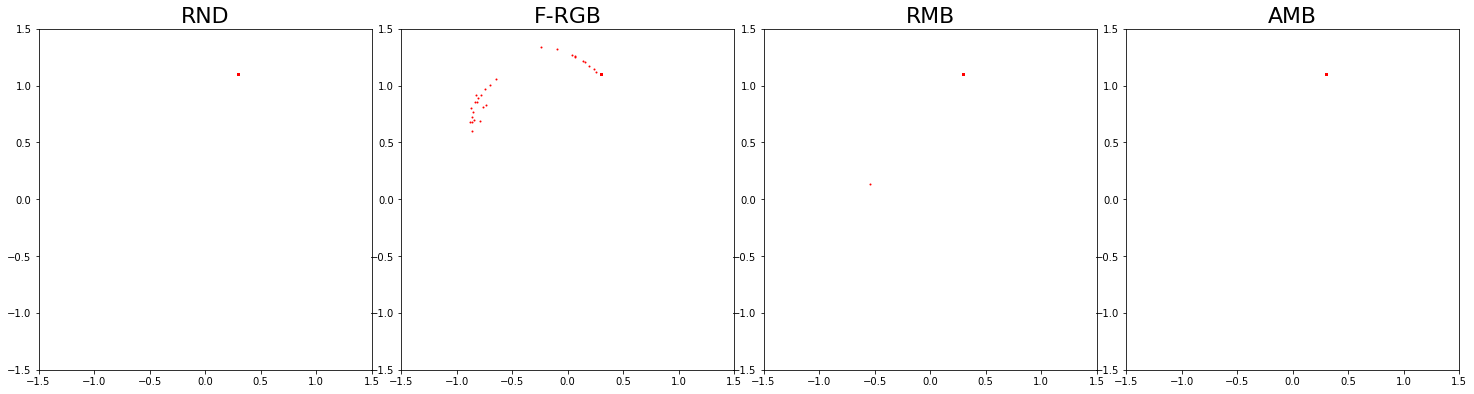

In [7]:
1# Compact Visu
def compact_explo_maps(max_episodes=None, run_nb=0):
    f, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(20,5))
    ax = (ax0, ax1, ax2, ax3)
    for i, (m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
        b_k = saves[m_id][run_nb]
        print(b_k['parameters']['model_type'])

        plot_agent_pos_exploration(ax[i], b_k['end_scratch1_x'][:max_episodes],
                                    b_k['end_scratch1_y'][:max_episodes],
                                    b_k['end_stick2_x'][:max_episodes], titles[i])
        print(len(np.unique(b_k['end_stick2_x'])))
        #ax[i].plot(b_k['end_pickaxe_x'][:max_episodes],b_k['end_pickaxe_z'][:max_episodes],'g.',markersize=20)
        #ax[i].plot(b_k['end_shovel_x'][:max_episodes],b_k['end_shovel_z'][:max_episodes],'b.',markersize=2)
        #add pickaxe and shovel positions
        unique, counts = np.unique(b_k['choosen_modules'], return_counts=True)
        print(dict(zip(unique, counts)))
        plt.tight_layout(pad=-1.0)

compact_explo_maps(max_episodes=50000, run_nb=0)
plt.show()

Making an exploration GIF for run nb 0
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
active_modular
random_flat
random_flat
random_modular
acti

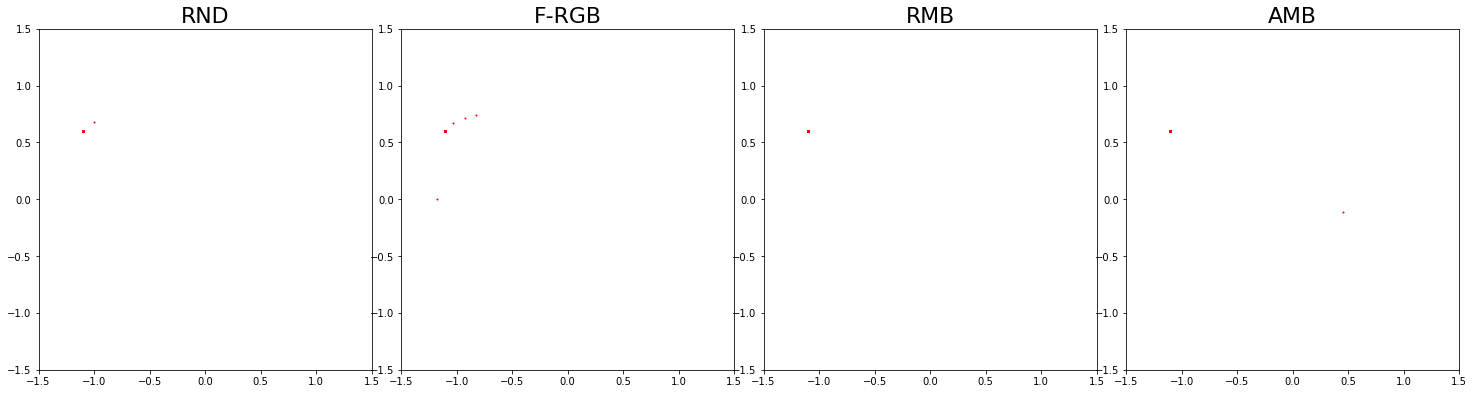

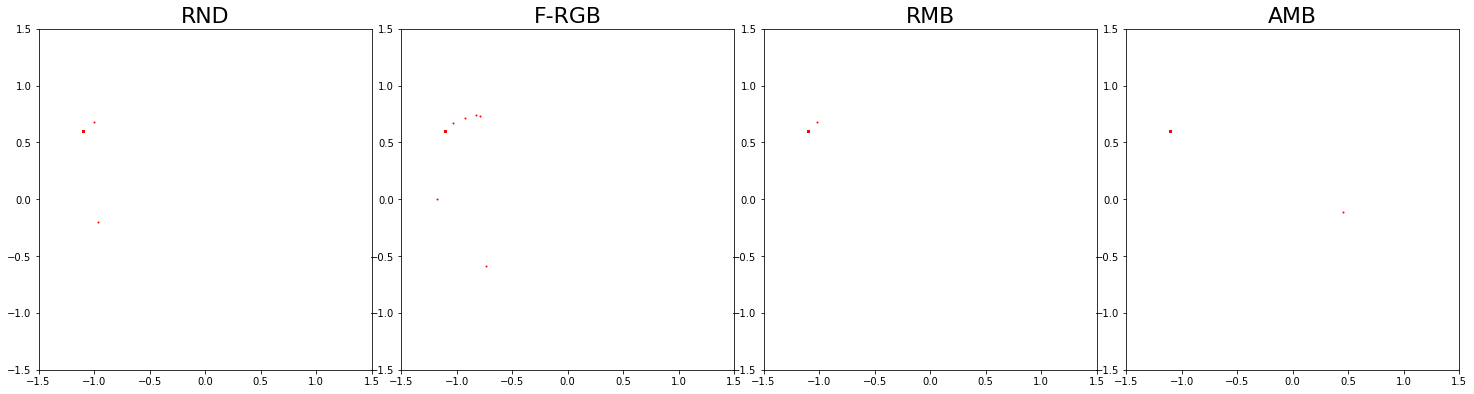

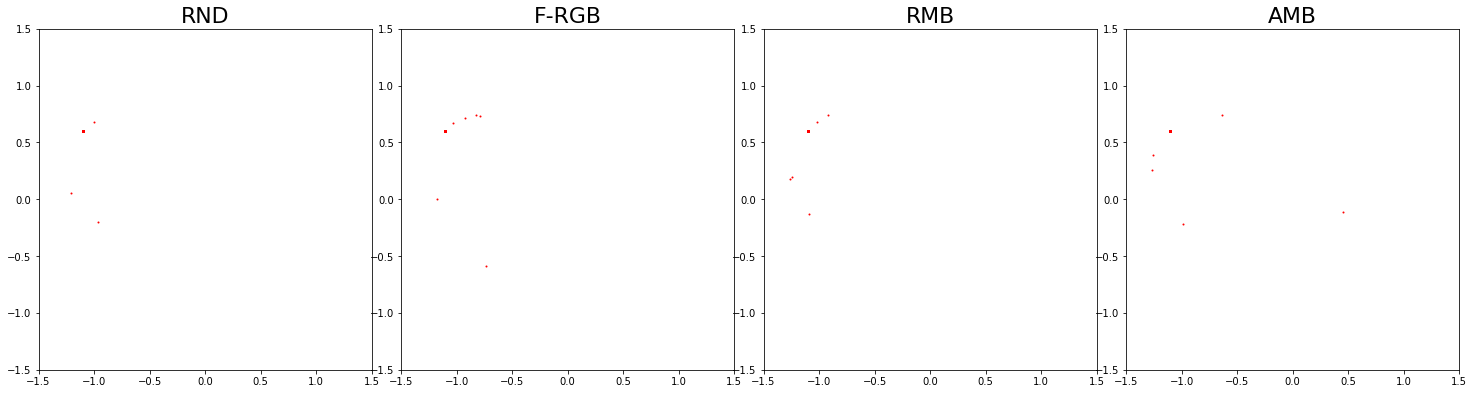

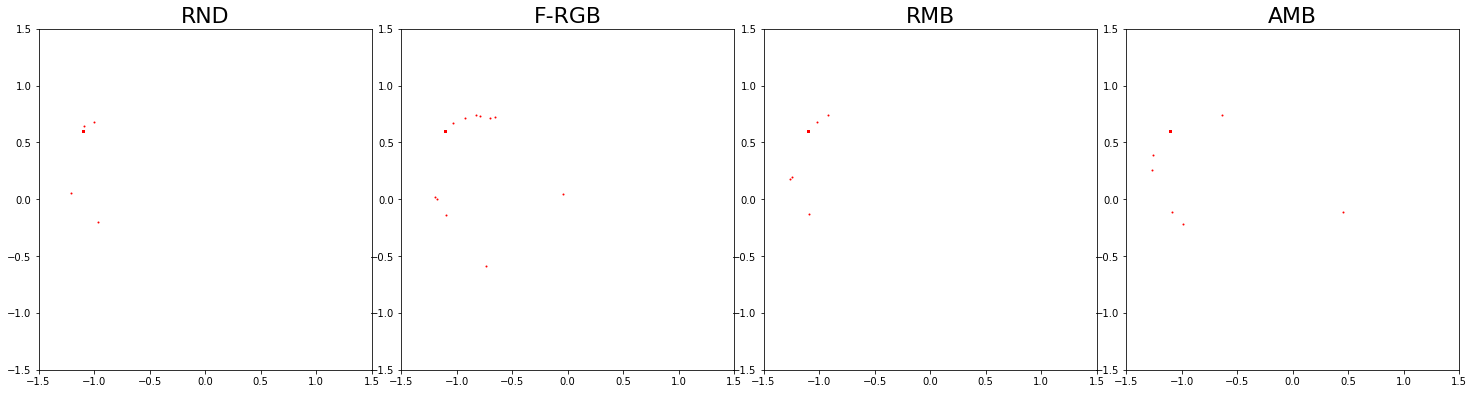

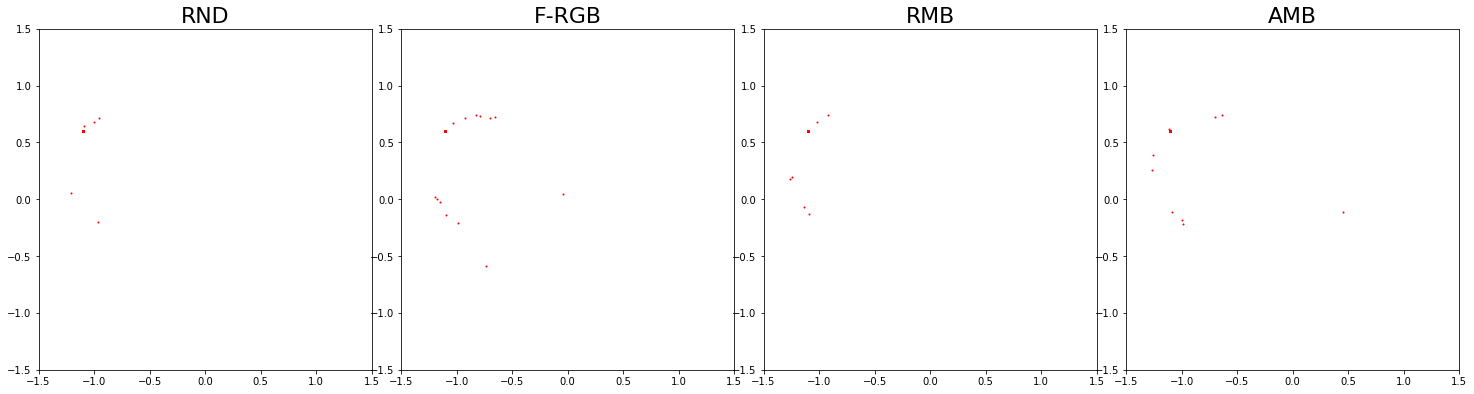

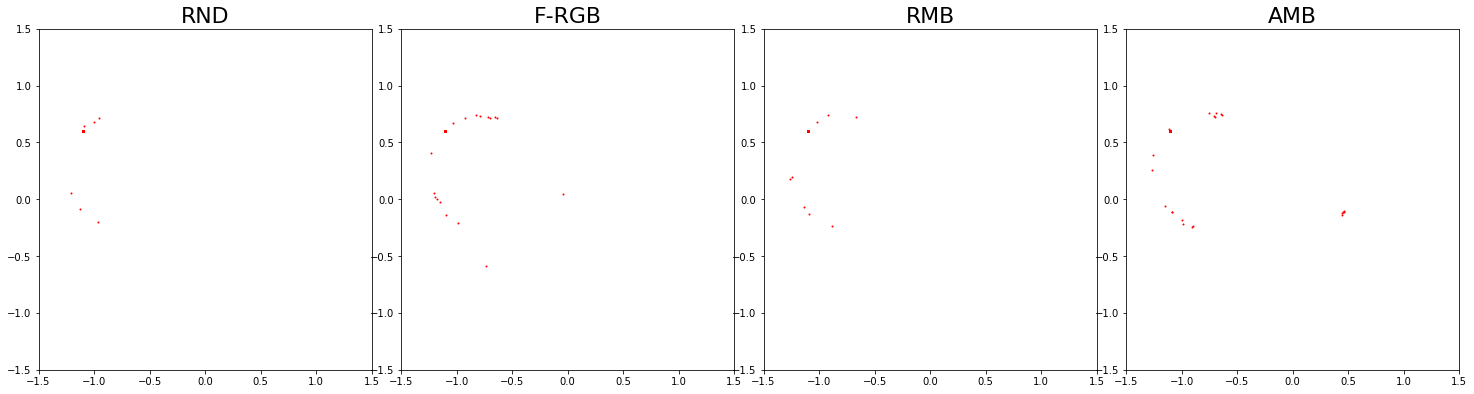

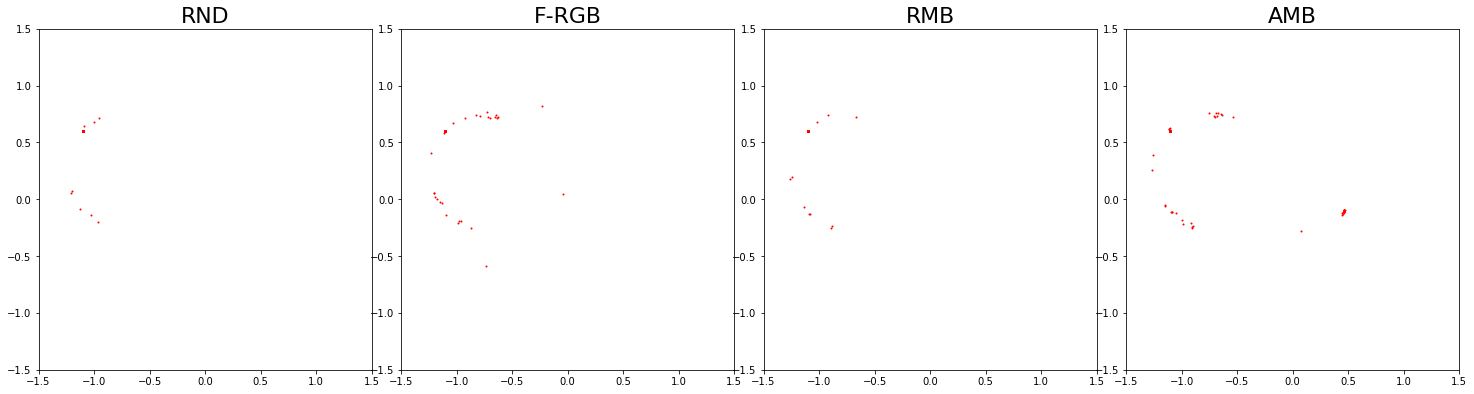

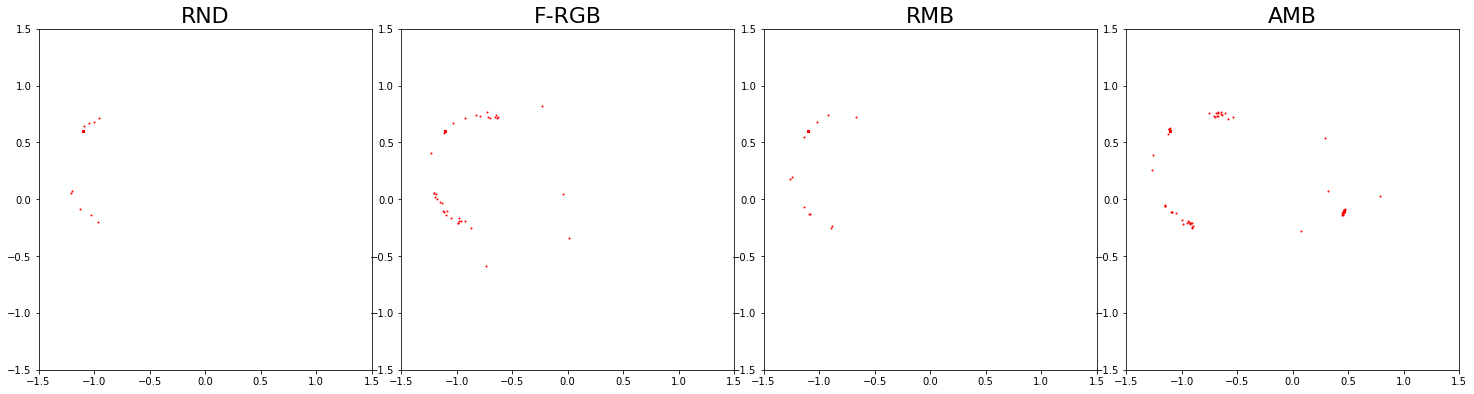

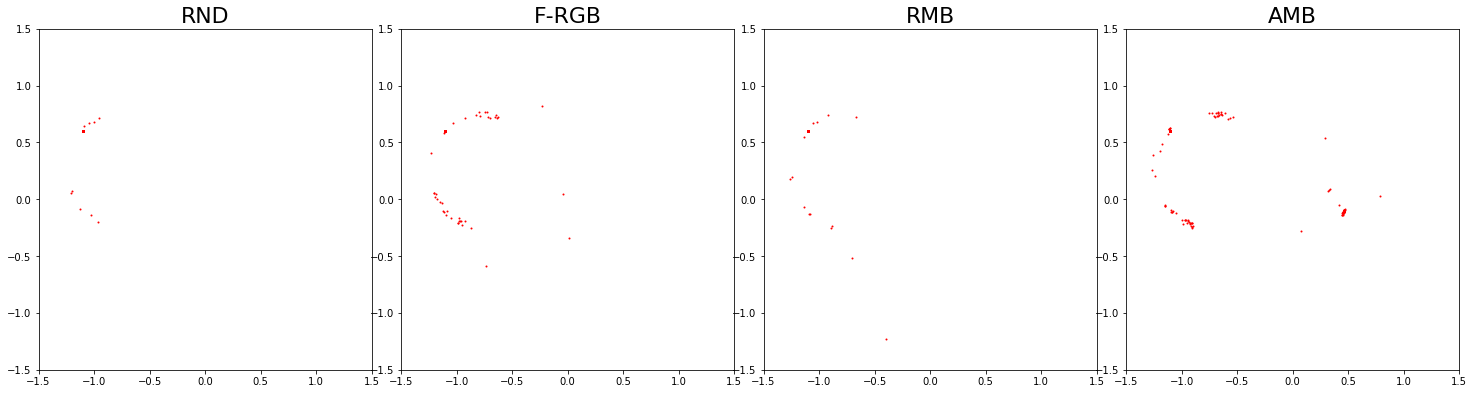

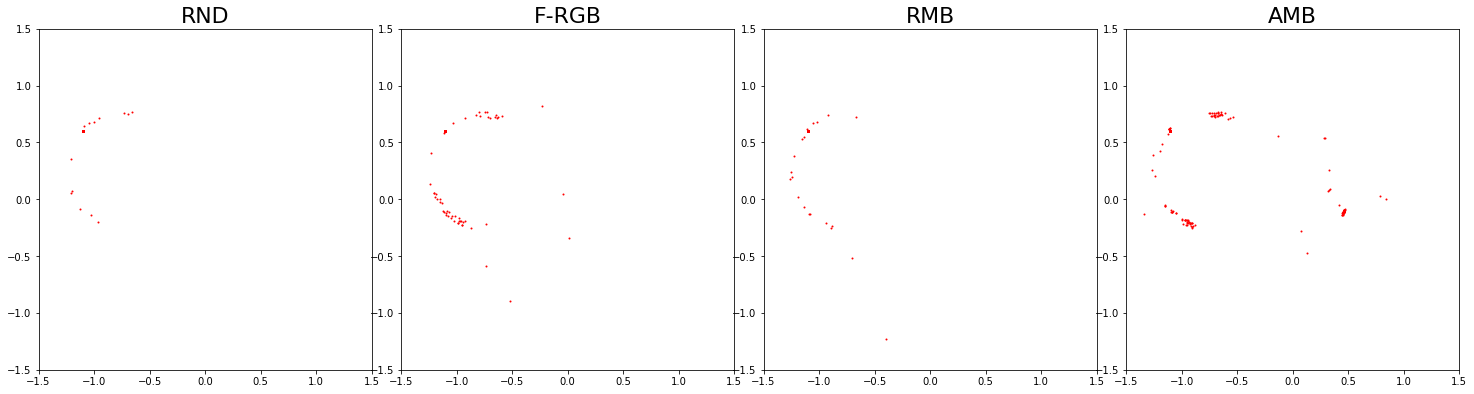

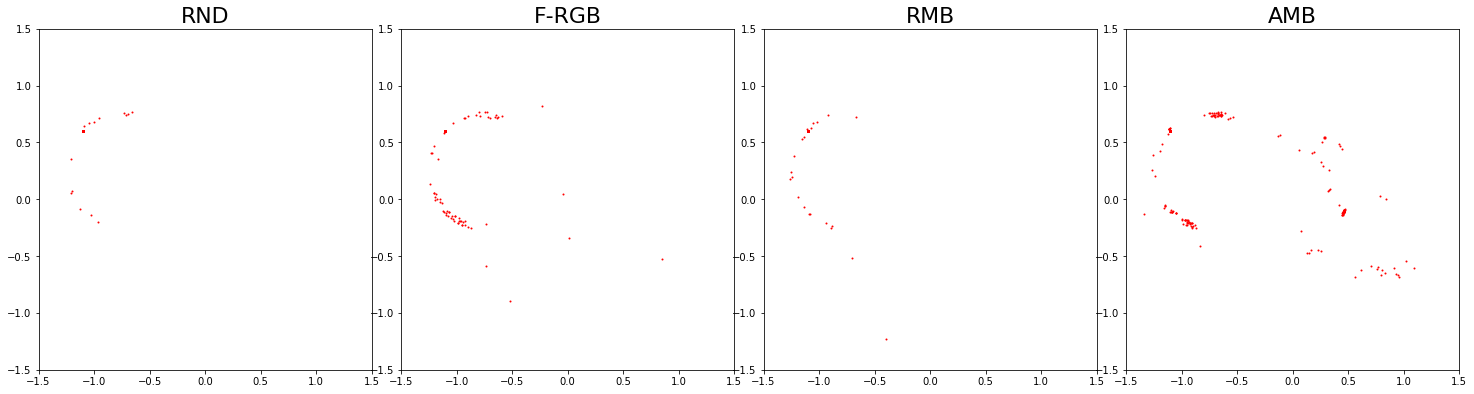

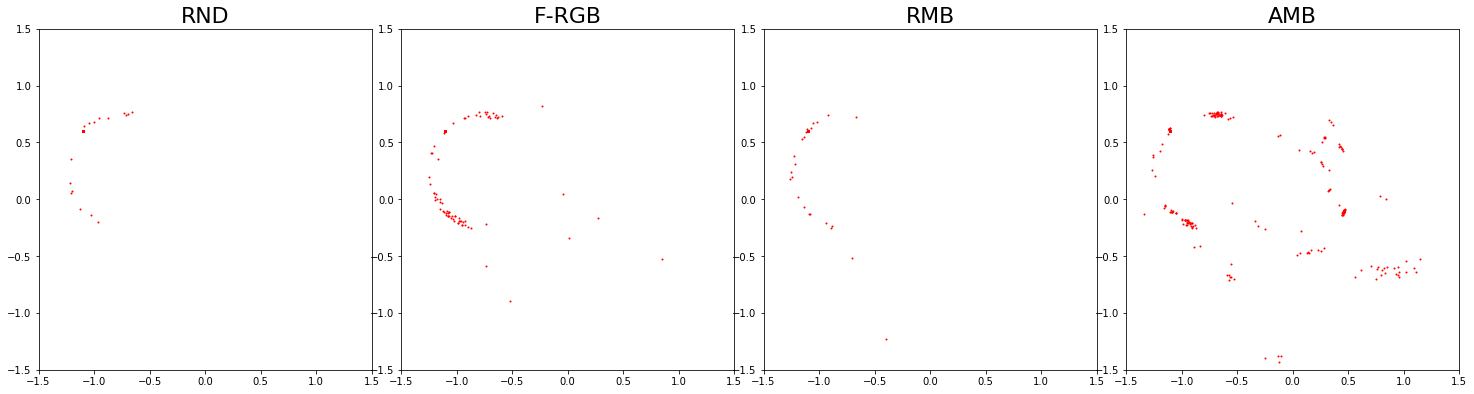

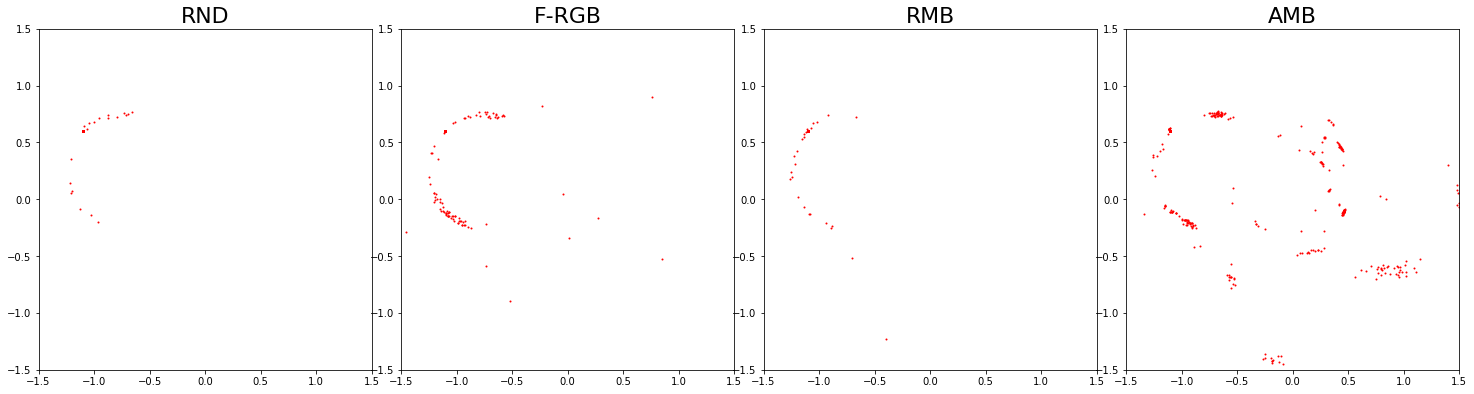

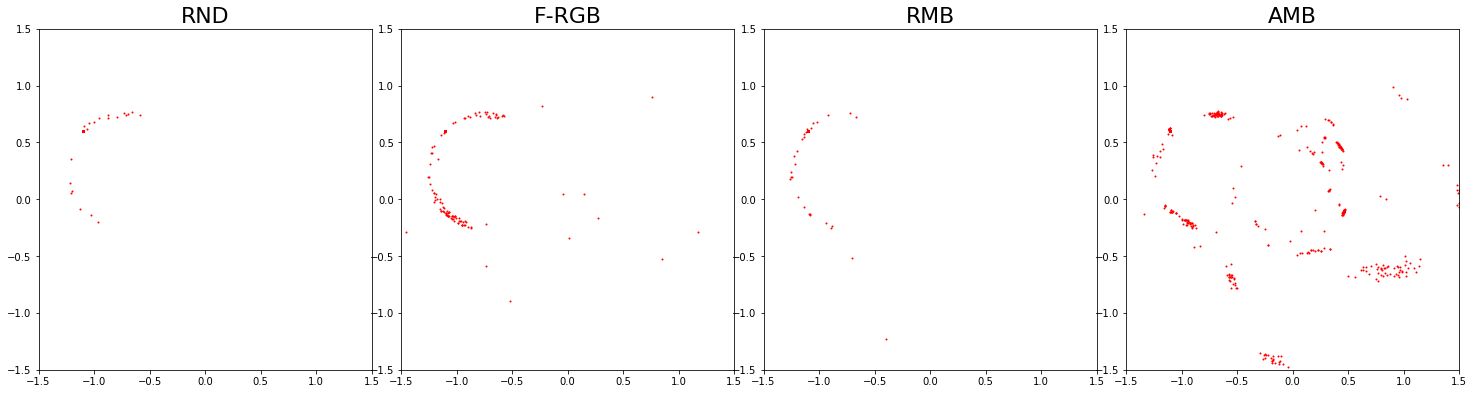

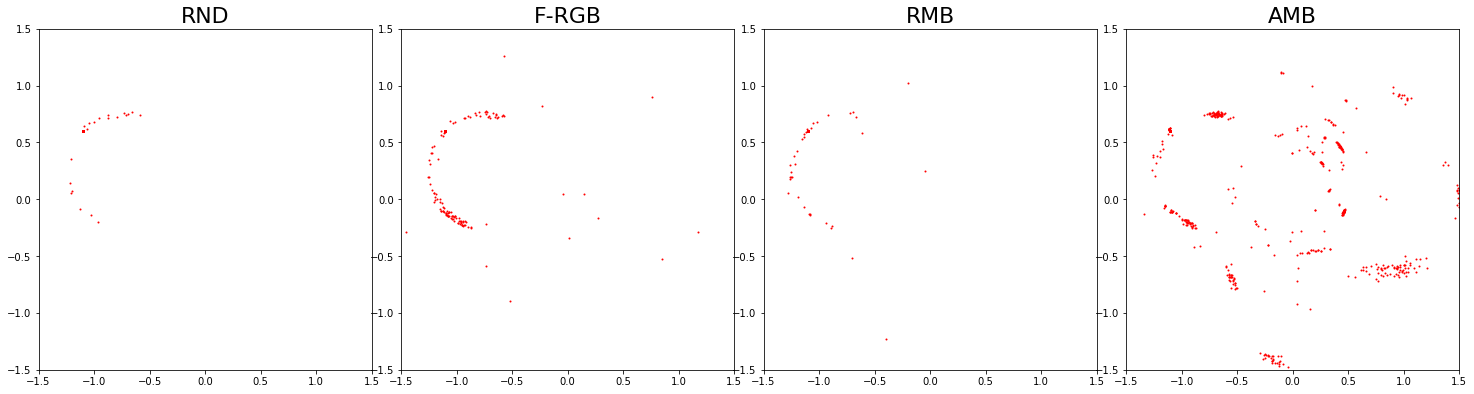

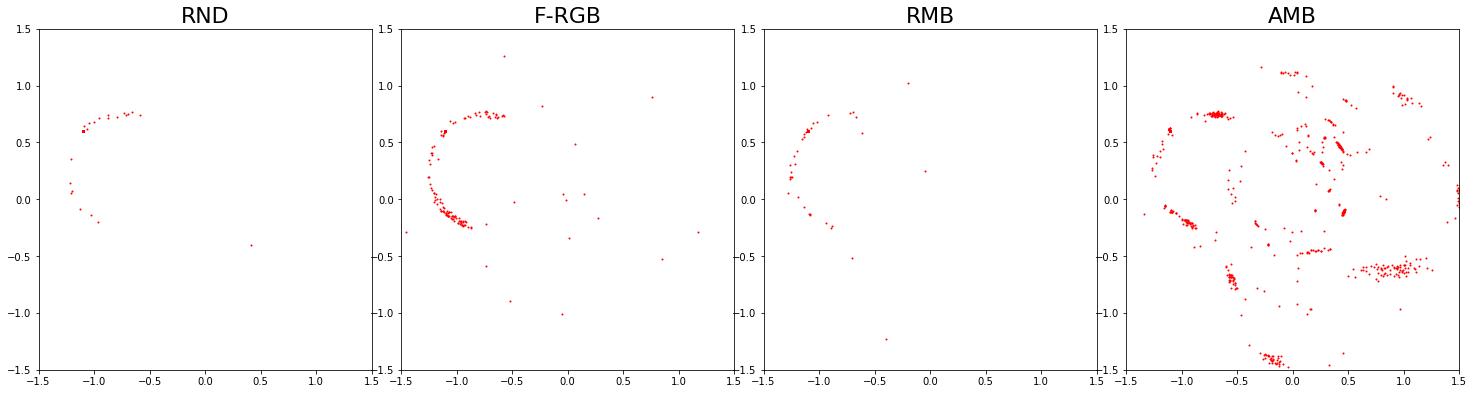

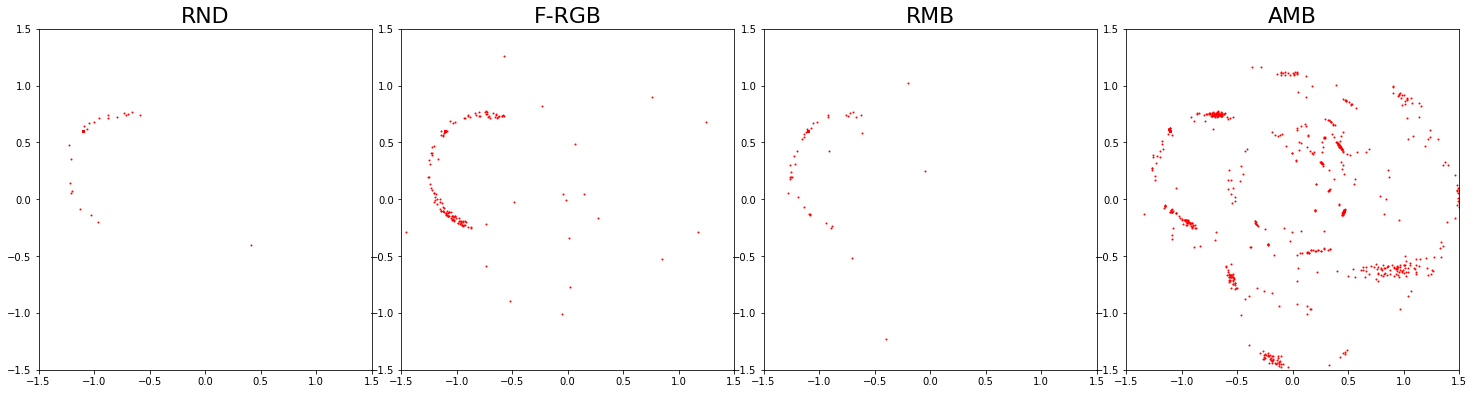

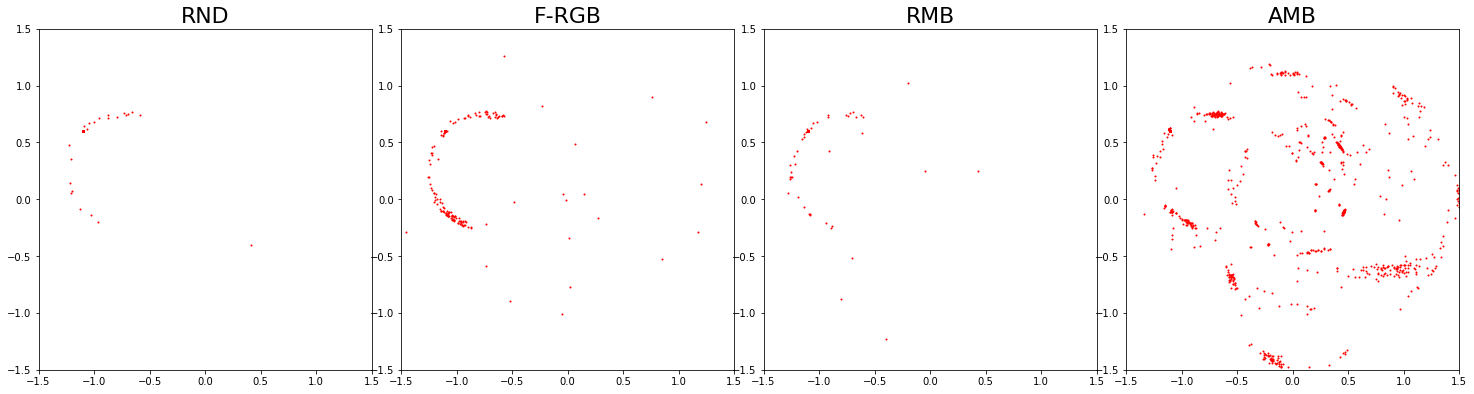

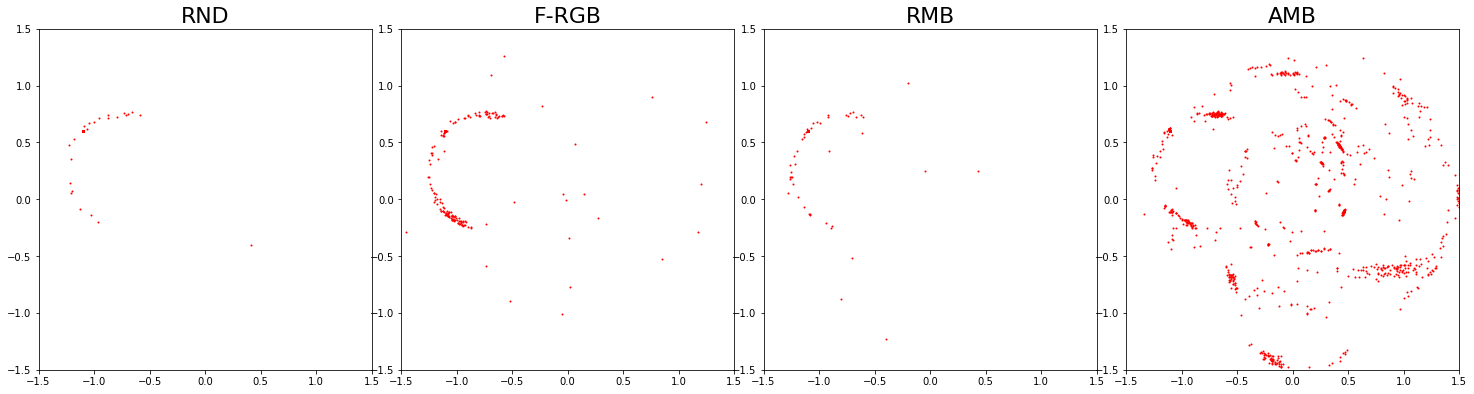

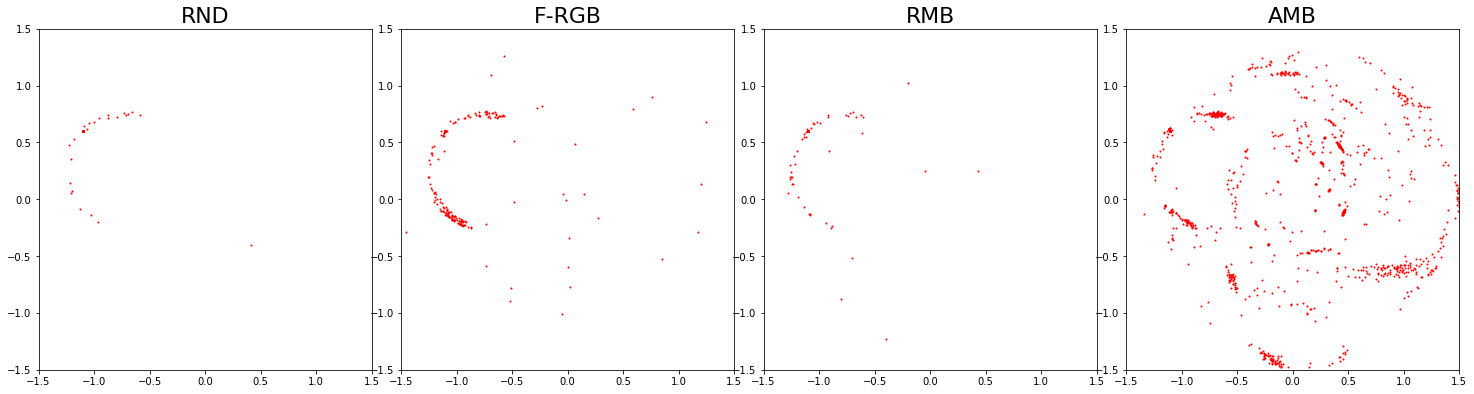

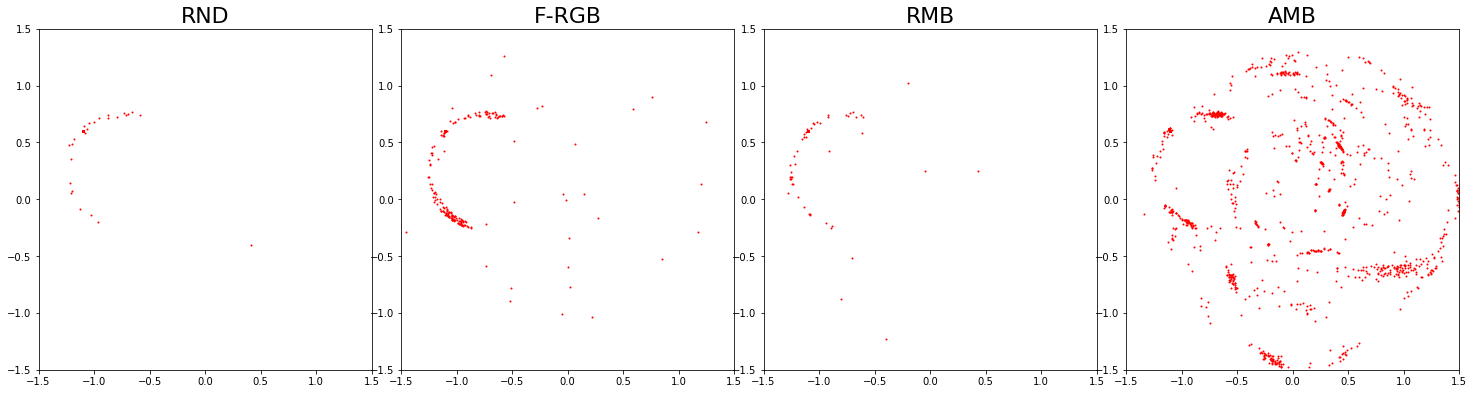

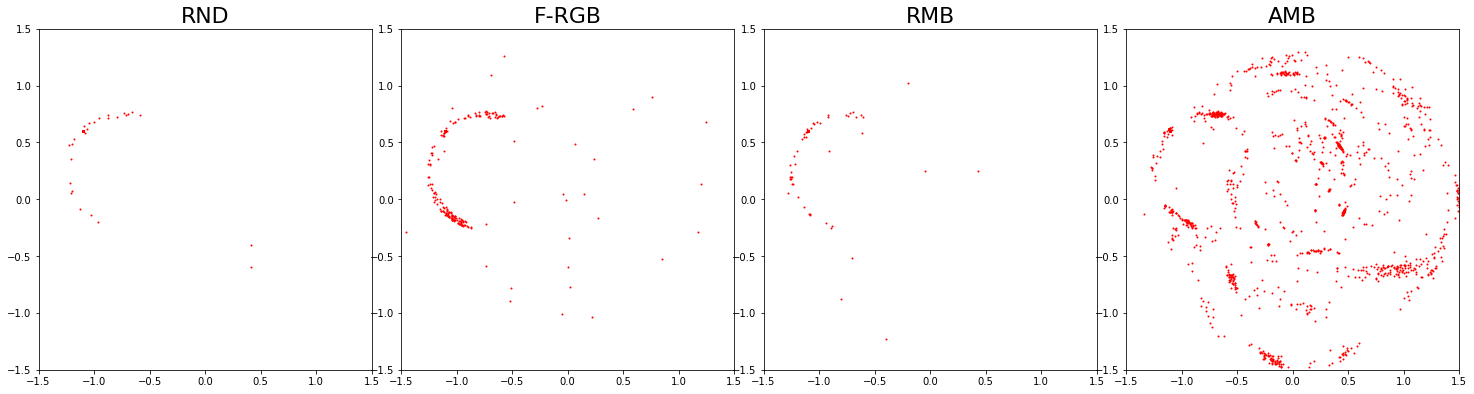

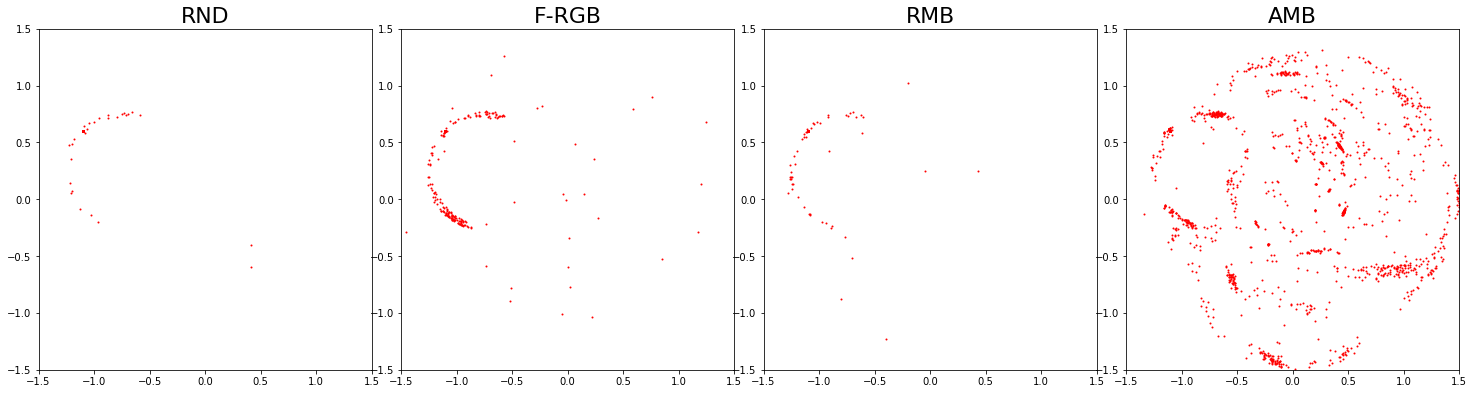

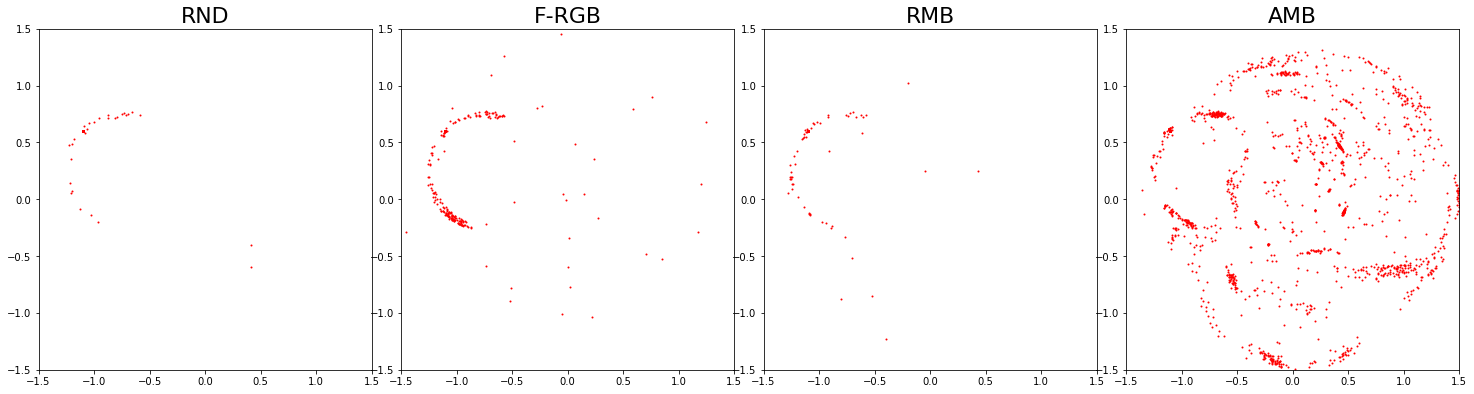

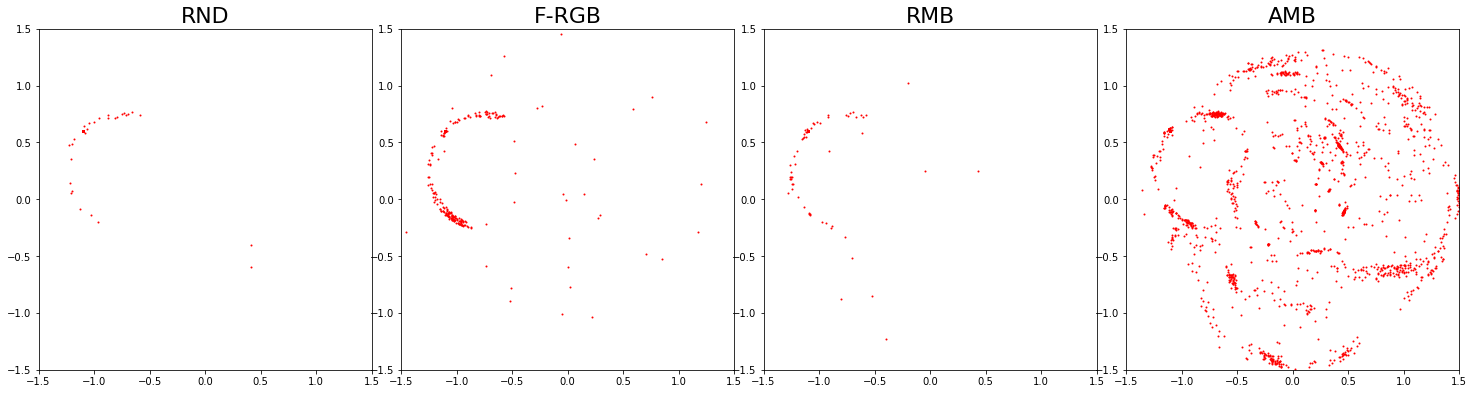

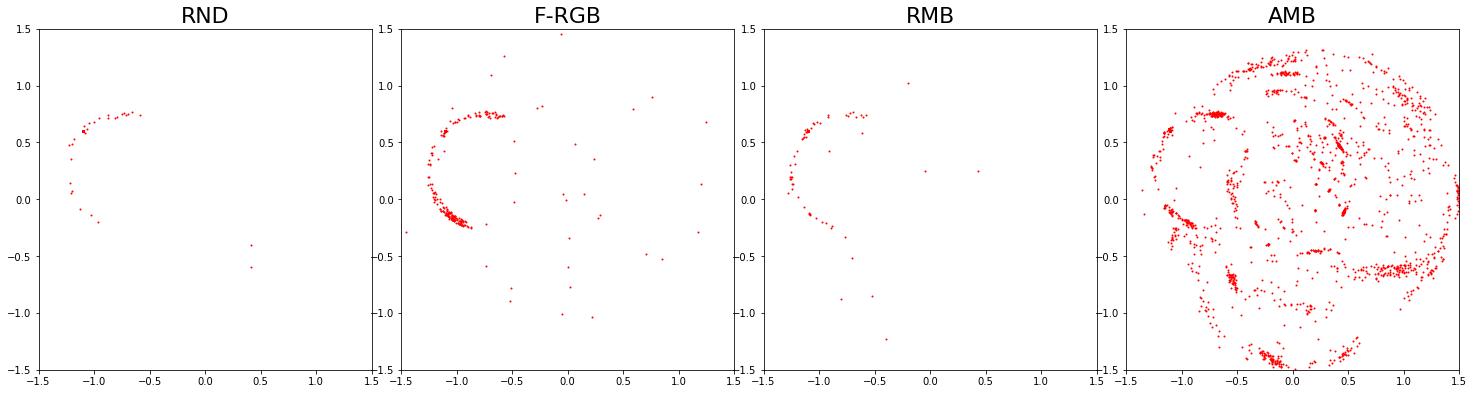

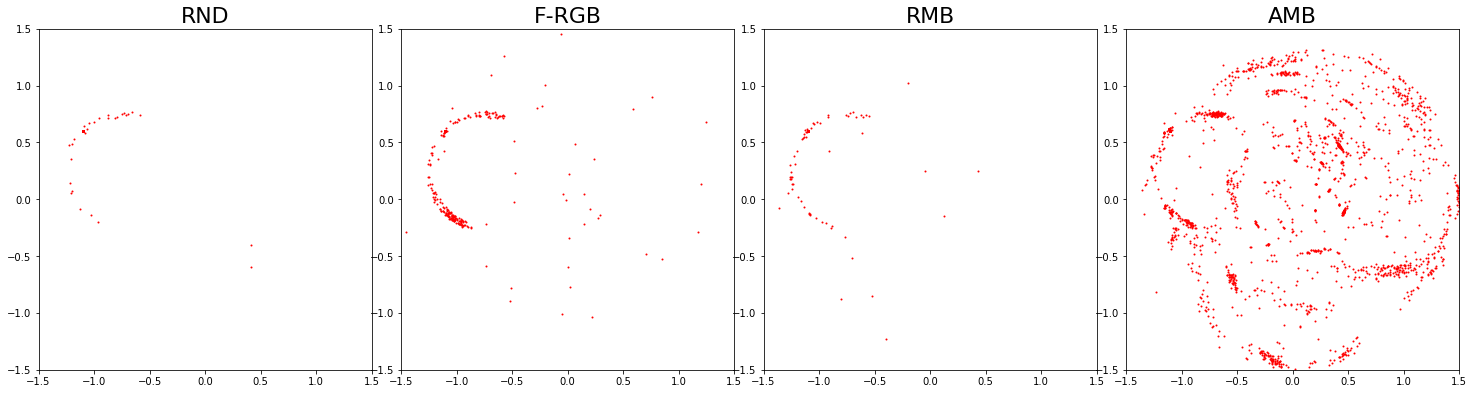

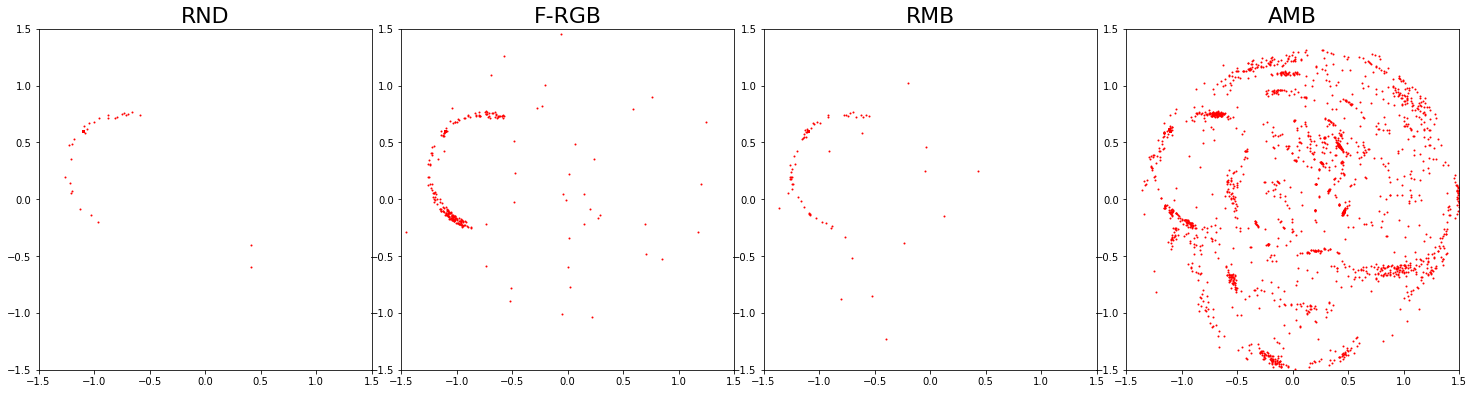

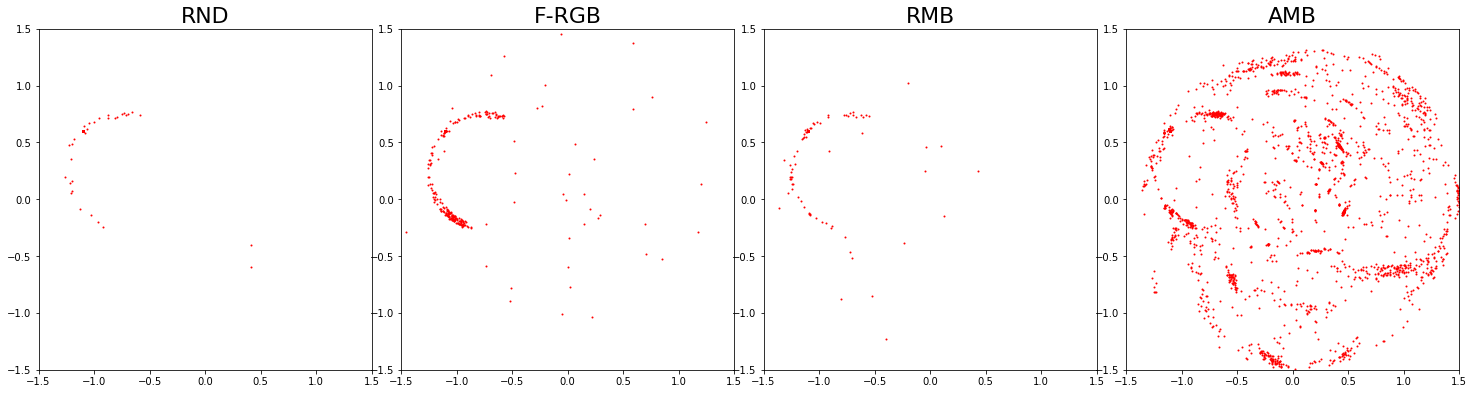

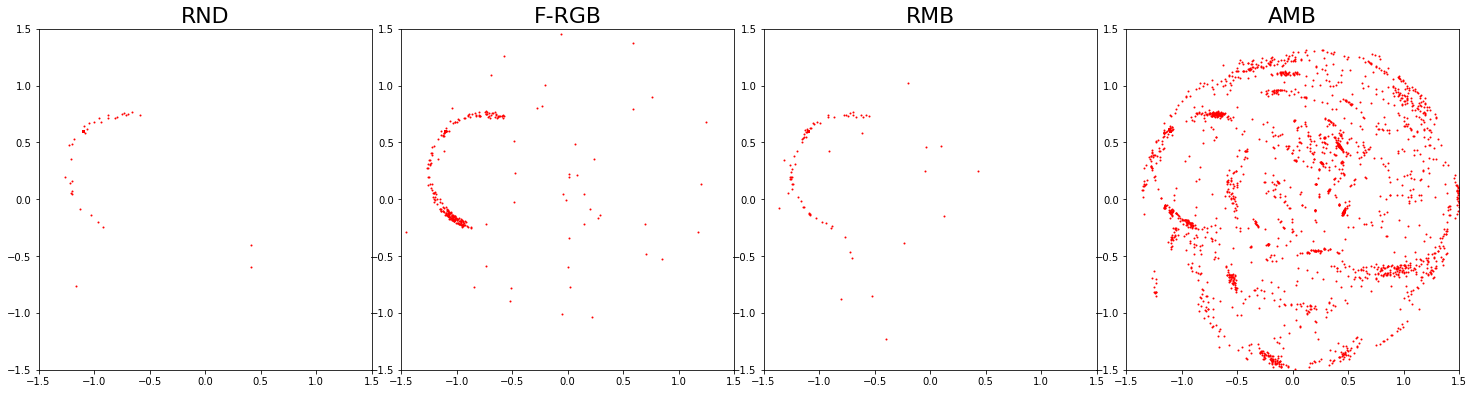

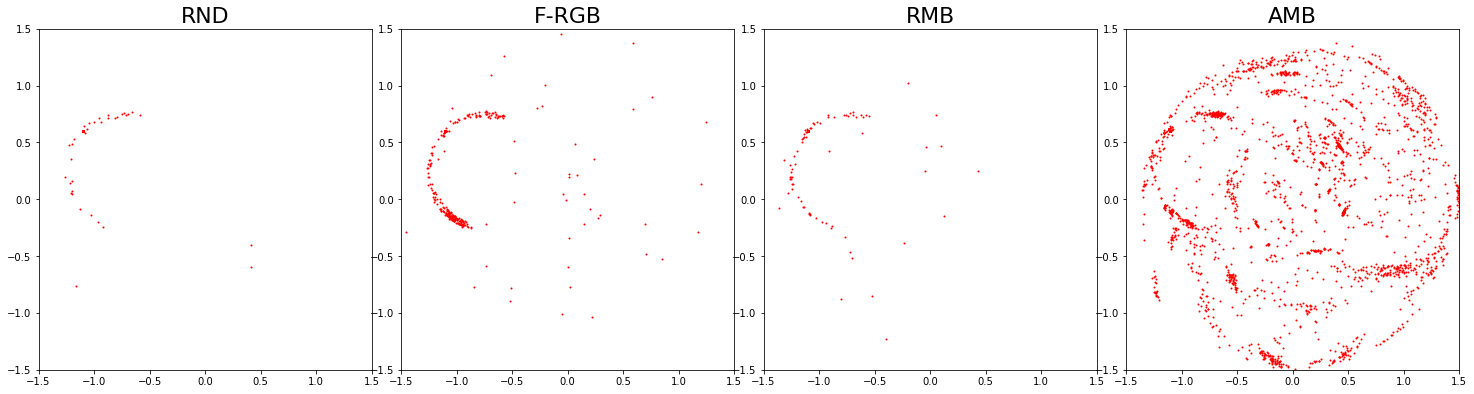

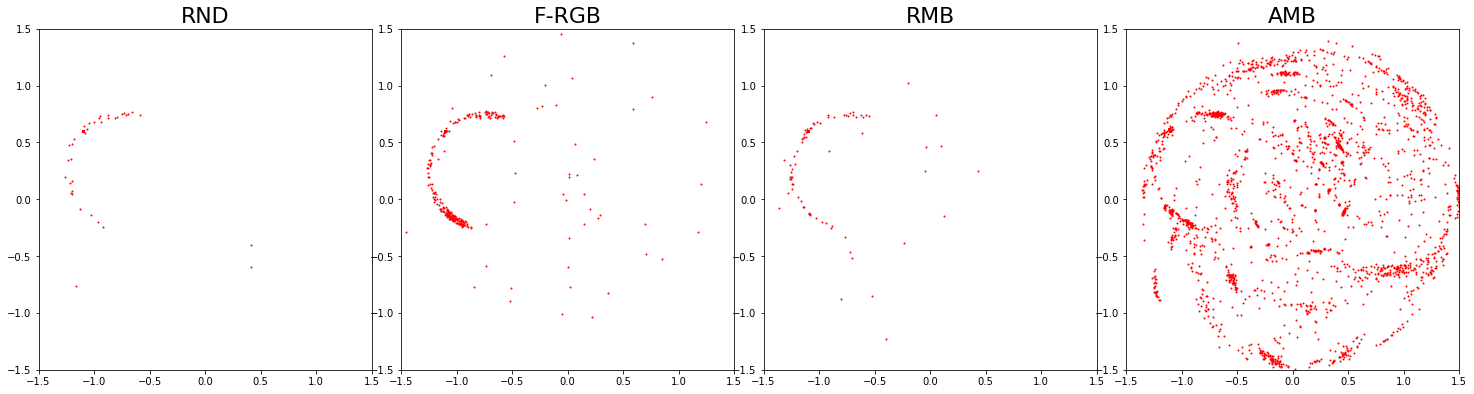

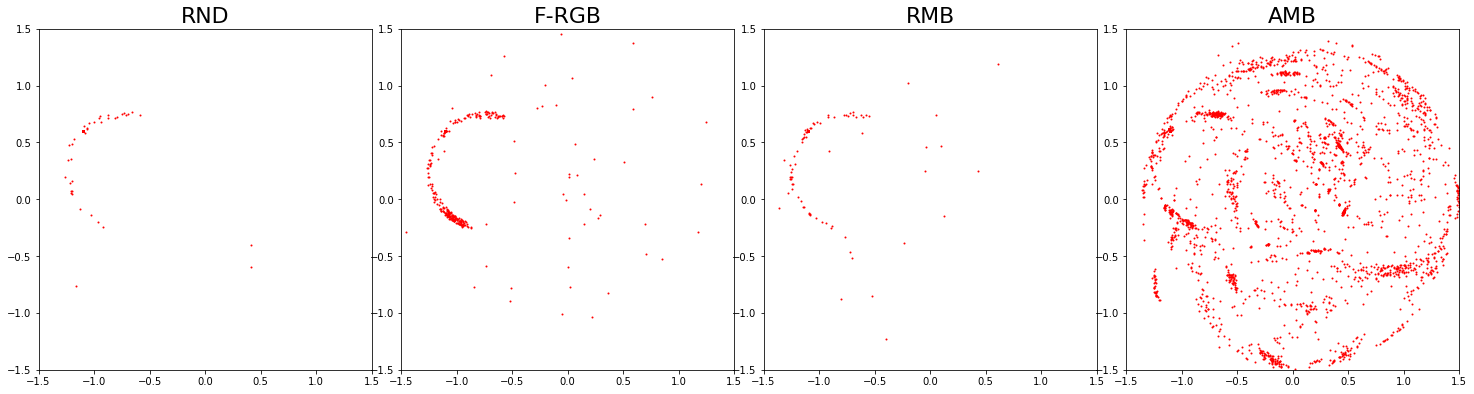

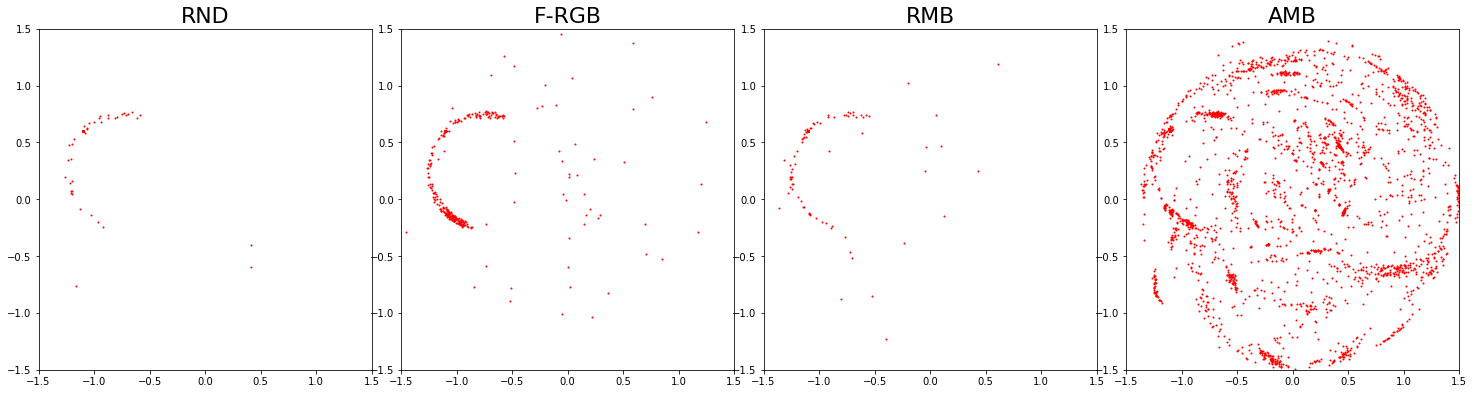

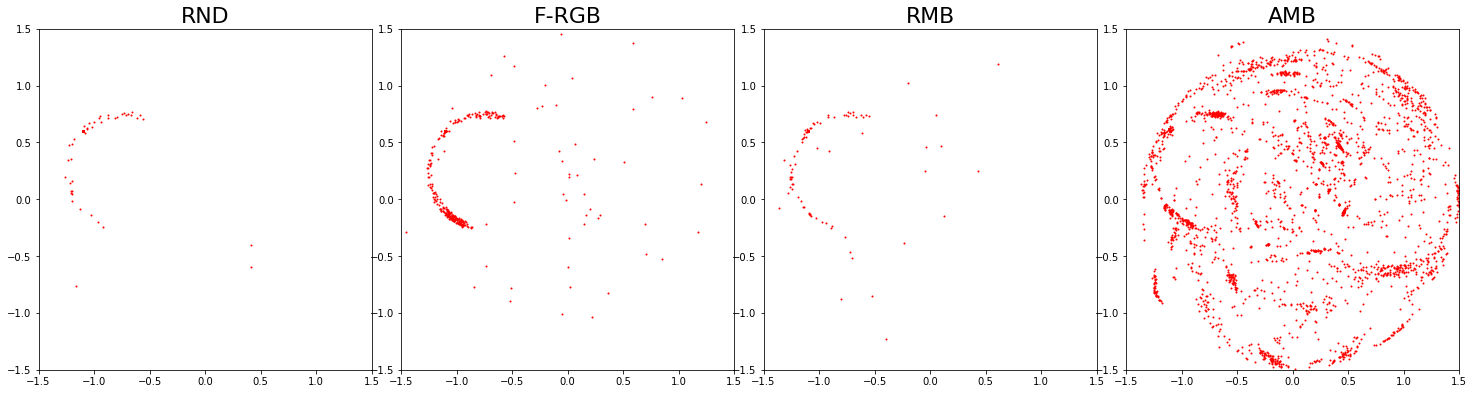

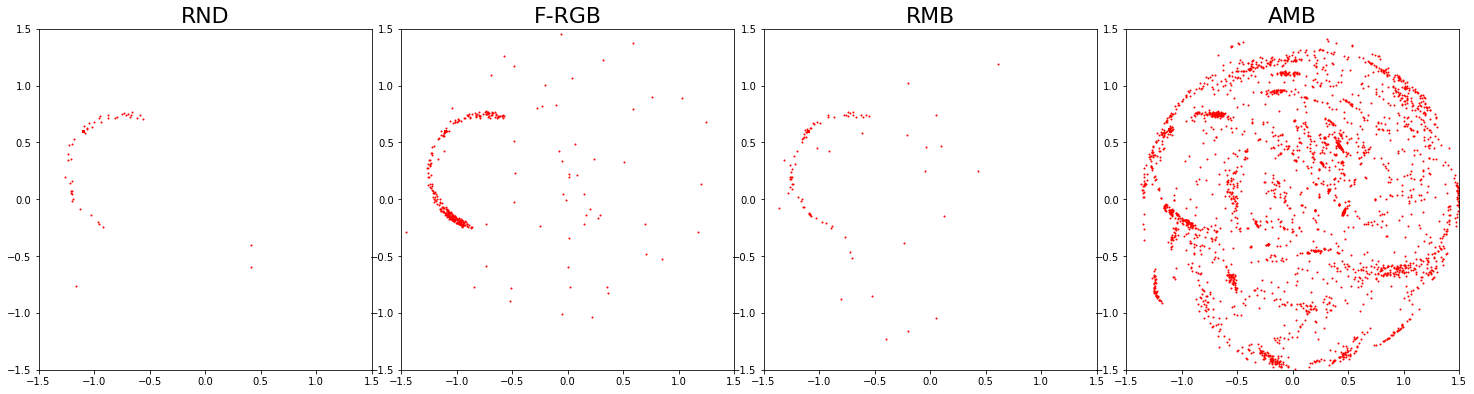

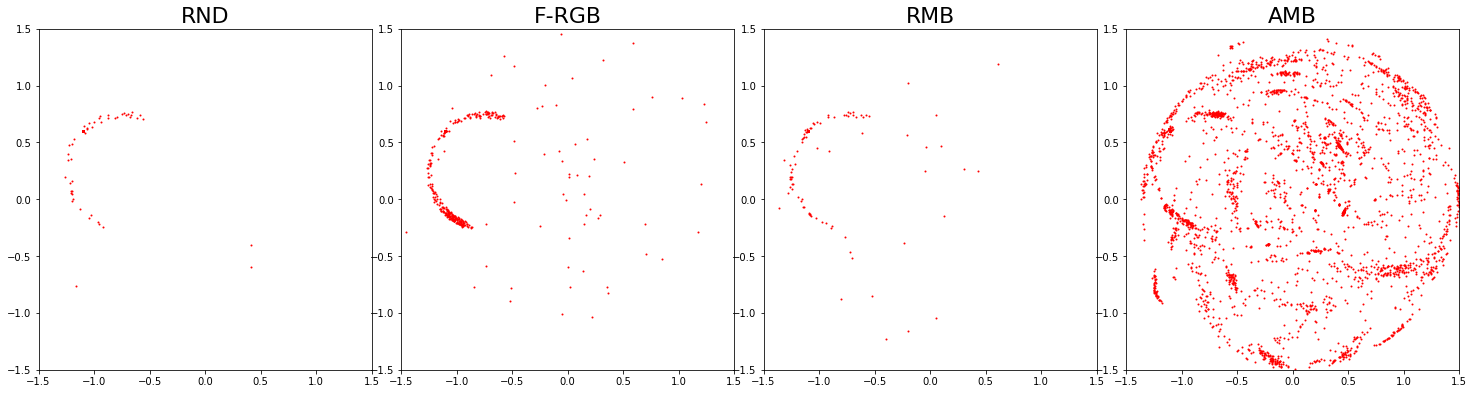

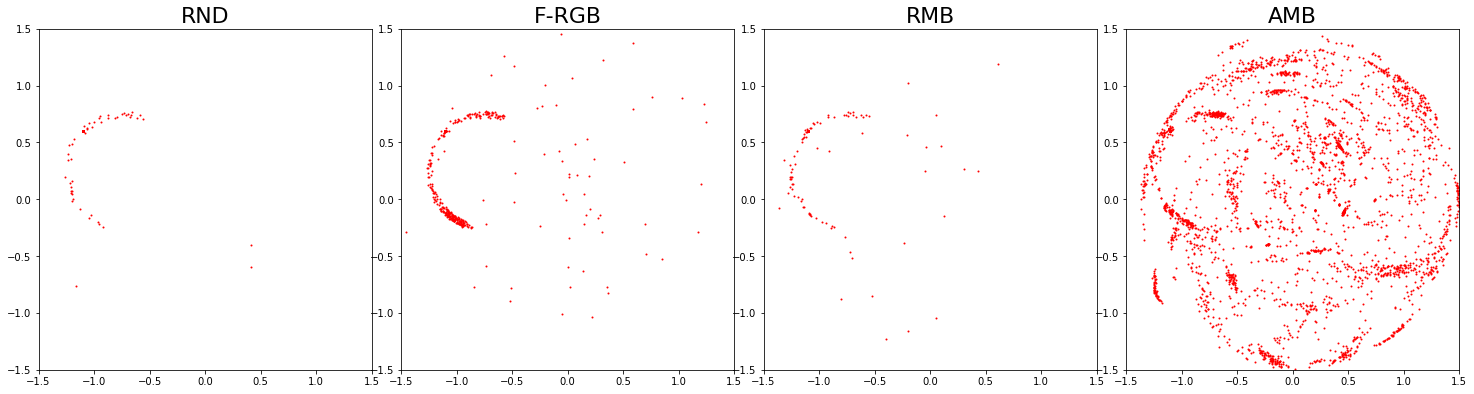

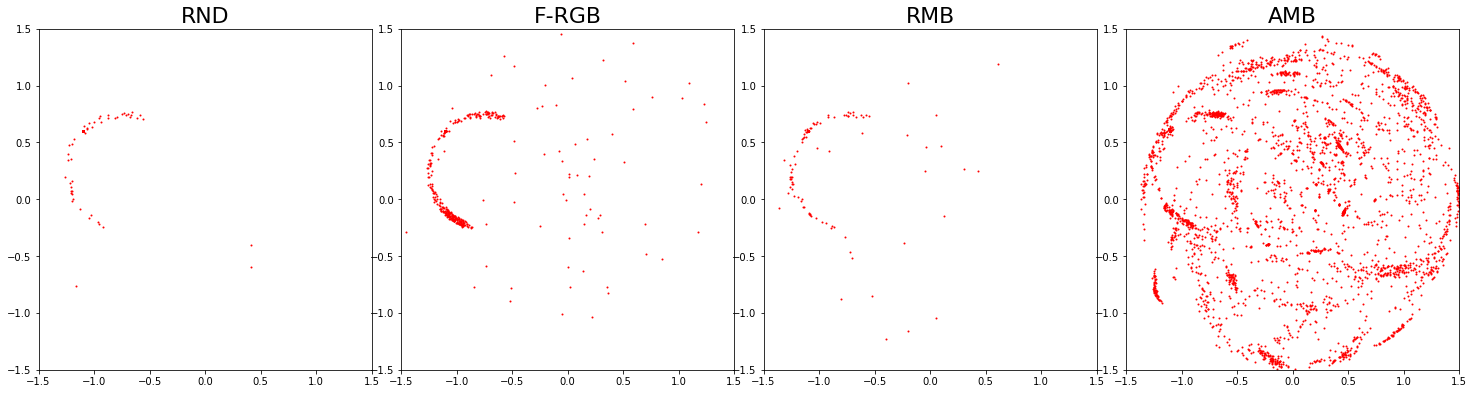

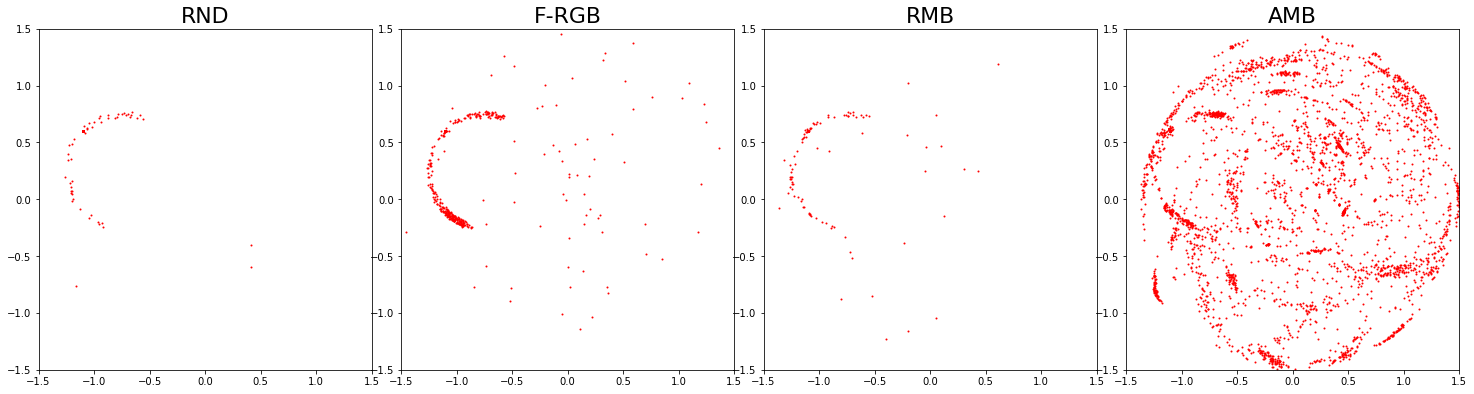

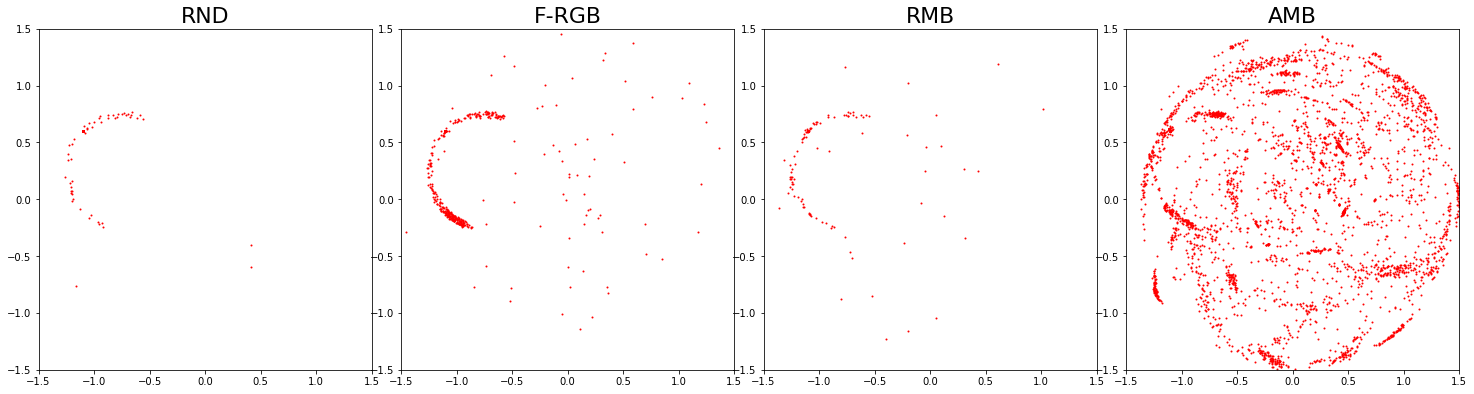

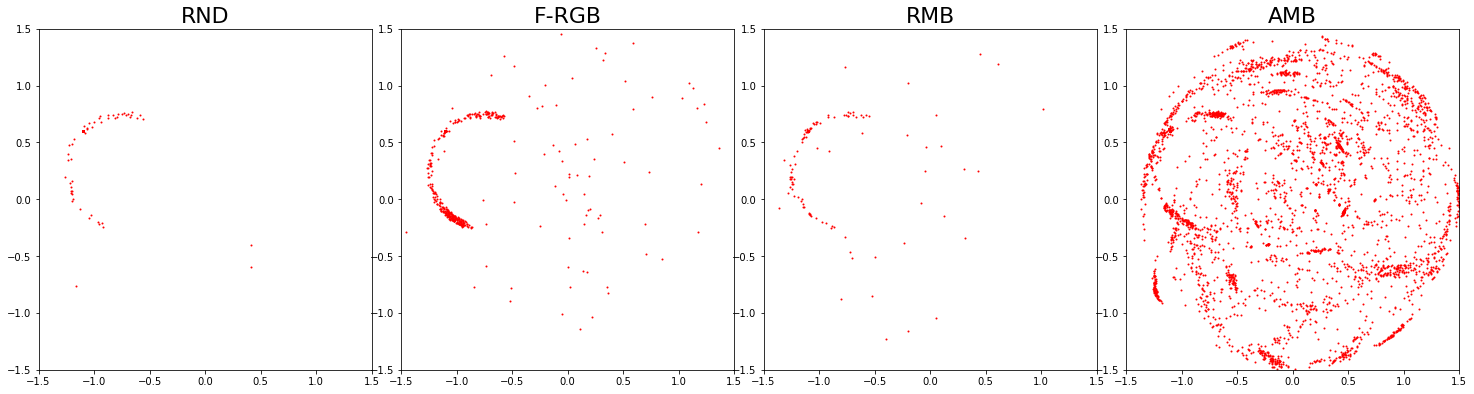

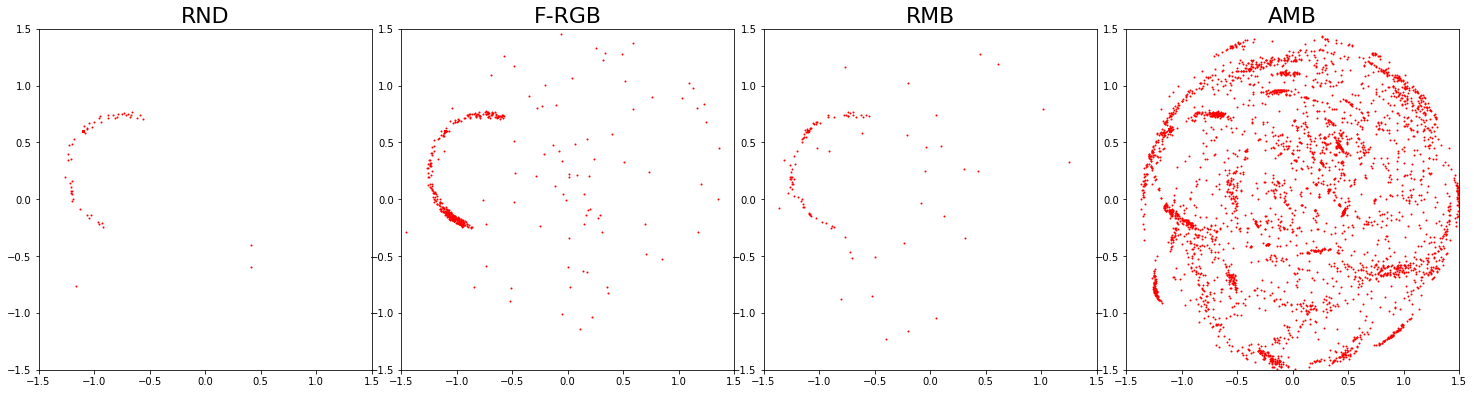

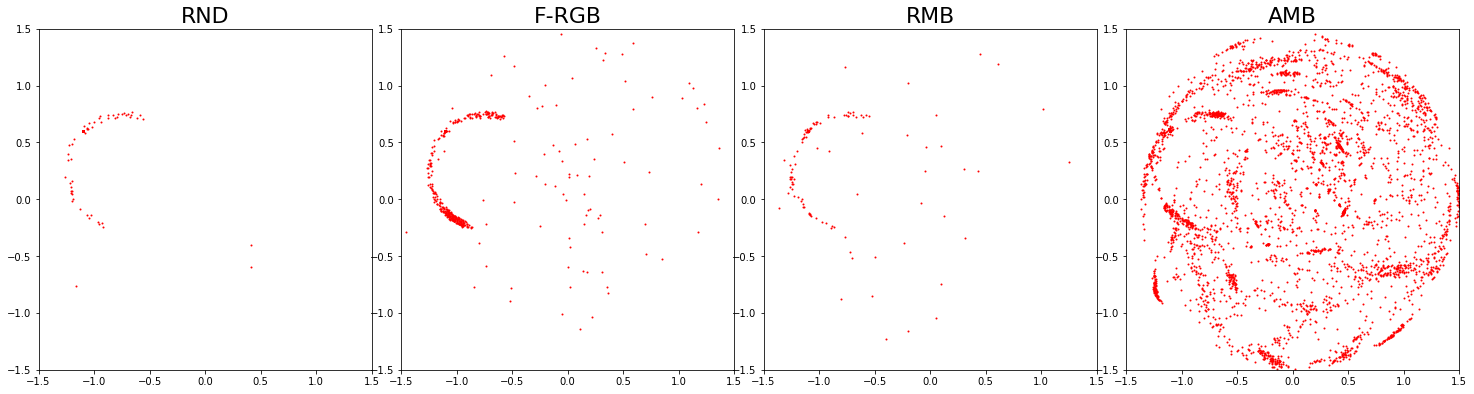

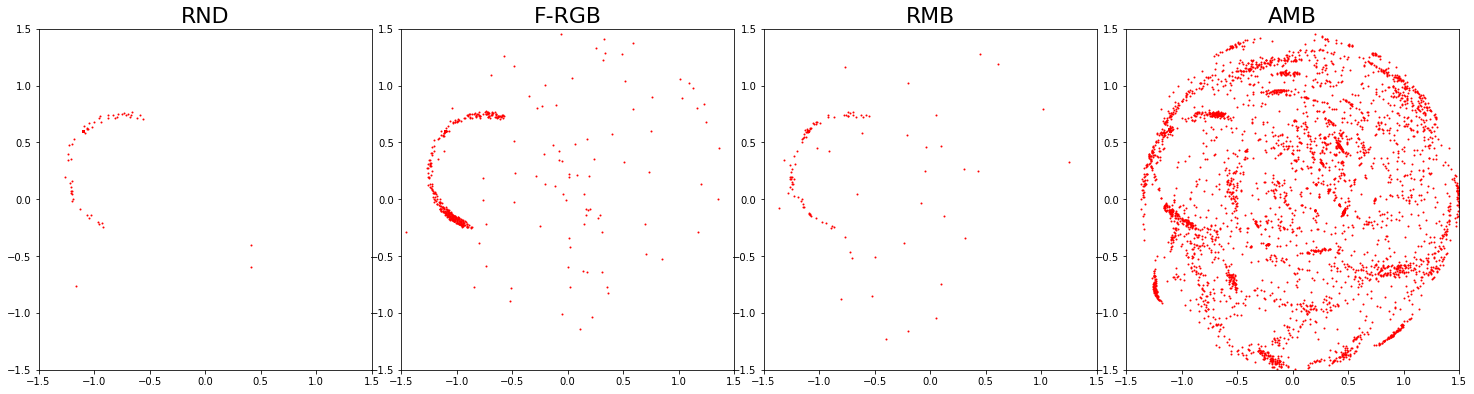

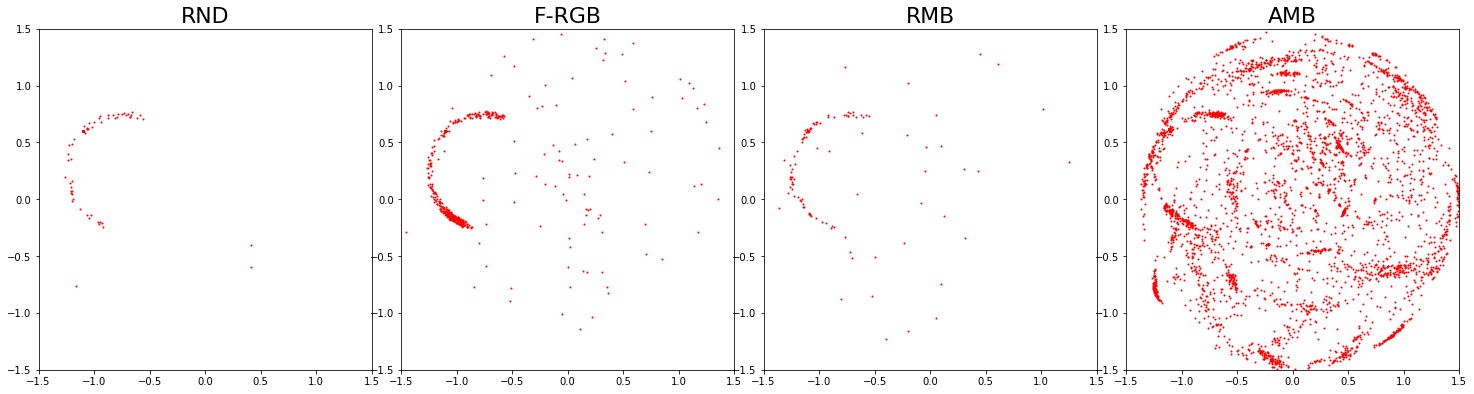

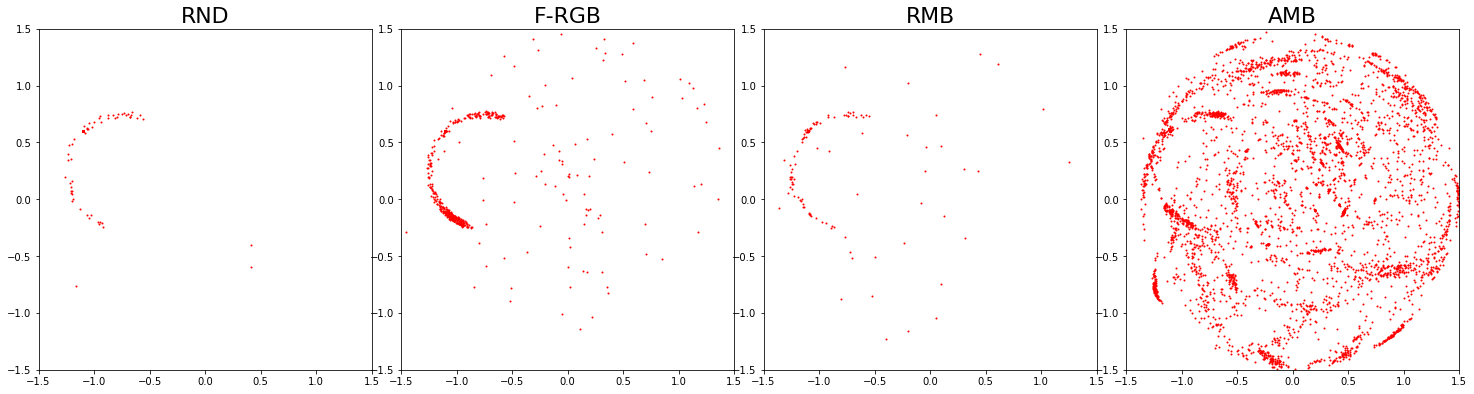

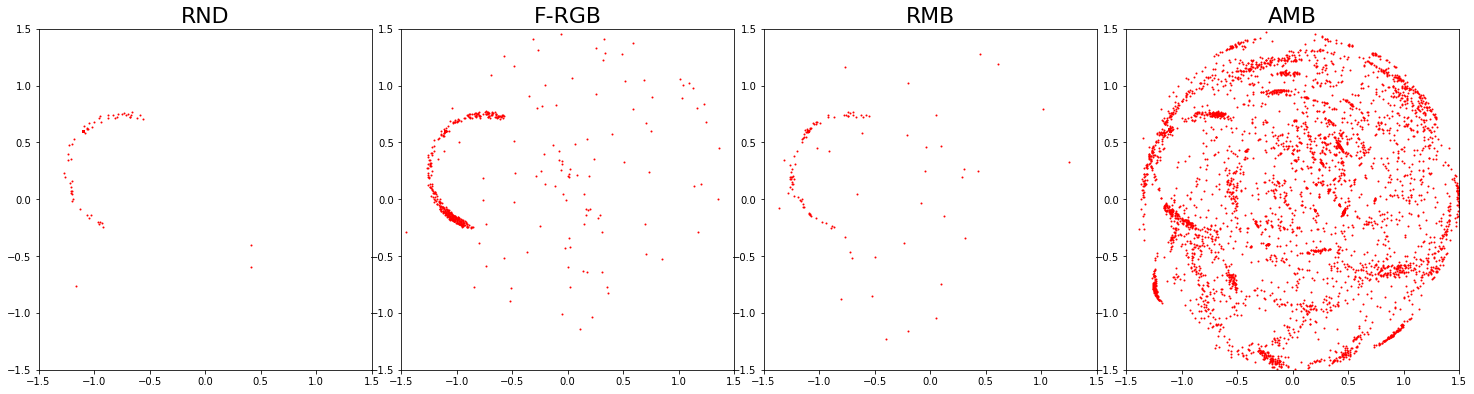

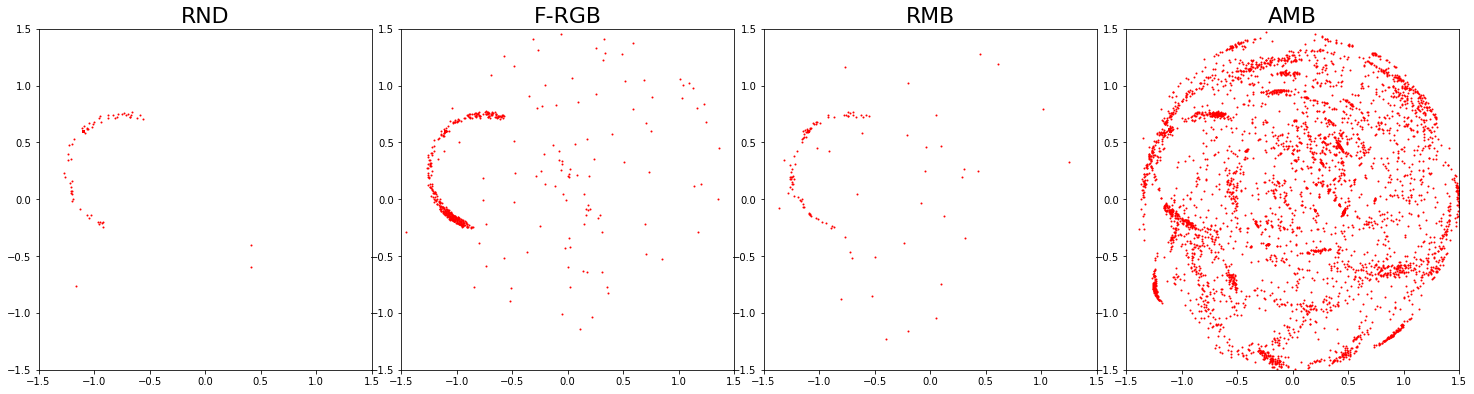

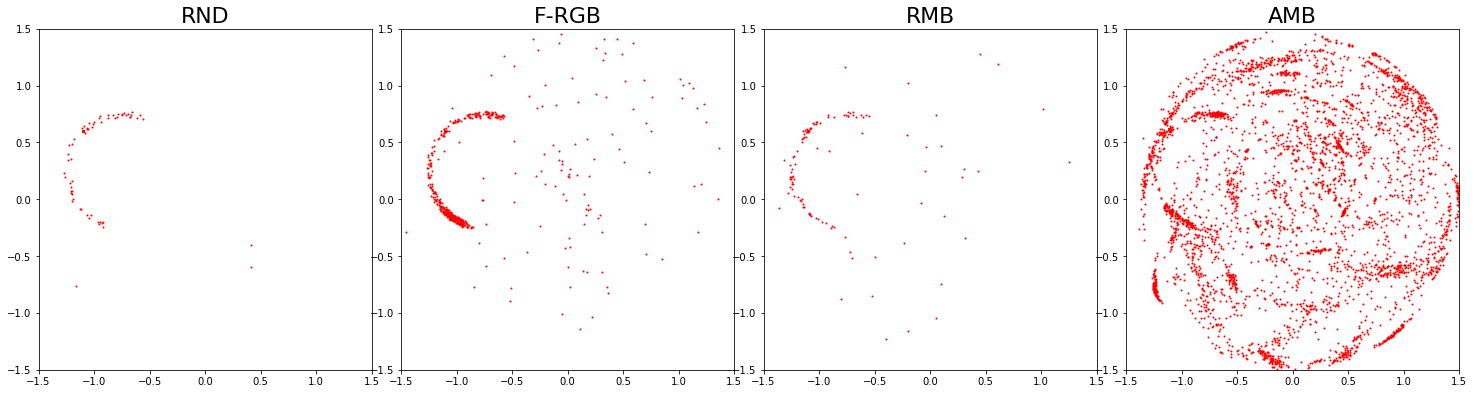

In [39]:
# # GIF out of compact vizu
# step_size = 1000
# nb_steps = int(nb_episodes / step_size)
# filenames = []
# for i,max_episodes in enumerate(np.arange(step_size,nb_episodes+step_size,step_size)):
#     print(i)
#     compact_explo_maps(max_episodes)
#     f_name = "graphics/exploration_coverage_{}.png".format(i)
#     plt.savefig(f_name, bbox_inches='tight')
#     filenames.append(f_name)

# import imageio
# images = []
# for filename in filenames:
#     images.append(imageio.imread(filename))
# imageio.mimsave('graphics/exploration.gif', images, duration=0.3)

# GIF out of compact vizu
def explo_gif(run_nb=0):
    print("Making an exploration GIF for run nb {}".format(run_nb))
    step_size = 1000
    nb_steps = int(30000 / step_size)
    filenames = []
    for i,max_episodes in enumerate(np.arange(step_size,nb_episodes+step_size,step_size)):
        #print(i)
        compact_explo_maps(max_episodes,run_nb)
        f_name = "graphics/exploration_coverage_{}.png".format(i)
        plt.savefig(f_name, bbox_inches='tight')
        filenames.append(f_name)
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('graphics/exploration{}.gif'.format(run_nb), images, duration=0.3)
for i in range(nb_runs):
    explo_gif(i)


![](graphics/exploration0.gif)

In [21]:
def get_nb_cells(x,y,nb_bins,rng):
    if y is not None: #2D case
        bin_numbers = sp.binned_statistic_2d(x, y, None, 'count',
                                                bins=nb_bins, range=rng).binnumber
    else: #1D case
        bin_numbers = sp.binned_statistic(x, None, 'count',
                                             bins=nb_bins, range=rng).binnumber
    return len(np.unique(bin_numbers))

# get env specific bounds
b = config.get_env_bounds('emmc_env')
nb_2d_cells = [10,30]
total_2d_cells = nb_2d_cells[0] * nb_2d_cells[1]
nb_c_cells = 30
nb_b_cells = 2**5

# Grid cell visualization
for m_id in model_filenames:
    stat[m_id]['agent_cells'] = []
    stat[m_id]['pickaxe_cells'] = []
    stat[m_id]['shovel_cells'] = []
    stat[m_id]['cart_cells'] = []
    stat[m_id]['b_combinations'] = []
    stat[m_id]['first_blocks'] = []
    stat[m_id]['first_swing_left'] = []
    stat[m_id]['first_swing_right'] = []
    stat[m_id]['first_cart_touched'] = []
    stat[m_id]['eval_cart_touched'] = []
    stat[m_id]['chosen_modules'] = []
def mean_std(data_name):
    mean = round(np.mean(stat[m_id][data_name]),3)
    std = round(np.std(stat[m_id][data_name]),3)
    return mean,std

name_2d_spaces = ['agent', 'pickaxe', 'shovel']
for m_name, m_id in zip(model_full_names,model_filenames):
    for i in range(nb_runs):
        b_k = saves[m_id][i]
        
        # grid cell for 2d outcome spaces (agent, pickaxe, shovel)
        for outc_space in name_2d_spaces:
            #print(outc_space+'_x')
            name = 'end_{}'.format(outc_space)
            bnd_x = b.get_bounds([outc_space+'_x'])
            bnd_z = b.get_bounds([outc_space+'_z'])
            bnds = bnd_x + bnd_z
            #print(bnds)
            nb_expl_cells = get_nb_cells(b_k[name+'_x'], b_k[name+'_z'],
                                         nb_2d_cells, bnds)
            stat[m_id][outc_space+'_cells'].append((nb_expl_cells/total_2d_cells)*100)
        
        #cart grid cell
        c_Xs = b_k['end_cart_x']
        nb_expl_cells = get_nb_cells(c_Xs, None,
                                     nb_c_cells, b.get_bounds(['cart_x']))
        stat[m_id]['cart_cells'].append((nb_expl_cells/nb_c_cells)*100)
        
        # first swing or touched car info
        try:
            first_cart_touched = next(x[0] for x in enumerate(c_Xs) if x[1] != 291.5)
        except StopIteration:
            first_cart_touched = 'never'
        # check for cart swing up
        try:
            first_swing_left = next(x[0] for x in enumerate(c_Xs) if x[1] > 296.2)
        except StopIteration:
            first_swing_left = 'never'
        try:
            first_swing_right = next(x[0] for x in enumerate(c_Xs) if x[1] < 286.8)
        except StopIteration:
            first_swing_right = 'never'
        
        #blocks
        b_vec = [b_k['end_block_0'], b_k['end_block_1'], b_k['end_block_2'],
                 b_k['end_block_3'], b_k['end_block_4']]
        b_vec = np.array(b_vec).reshape(-1,5)
        stat[m_id]['b_combinations'].append(len(np.unique(b_vec, axis=0)))
        
    
        
#         #blocks cell
#         first_blocks_found = []
#         for i in range(3):
#             try:
#                 first_found = nb_blocks.index(i)
#             except ValueError:
#                 first_found = 'never'
#             nb_found = nb_breads.count(float(i))
#             first_breads_found.append([first_found,nb_found])
#         #print( first_breads_found

#         final_bread_vec = np.zeros((len(bread_vec[0]),5))
#         #reconstruct original bread vectors
#         for bread_idx, v in enumerate(bread_vec):
#             for iter_idx in range(len(v)):
#                 final_bread_vec[iter_idx,bread_idx] = v[iter_idx]

#         b_explored_bins = len(np.unique(final_bread_vec,axis=0))
        
        

        
#         a_explored_bins, c_explored_bins, b_explored_bins, first_swing_left, first_swing_right, first_breads_found,\
#         first_cart_touched = get_grid_cell_exploration(b_k['end_agent_x'],
#                               b_k['end_agent_z'],
#                               b_k['end_cart_x'],
#                               b_k['end_bread_recovered'],
#                               [b_k['block_0'],b_k['block_1'],b_k['block_2']],
#                               c_bins=nb_c_cells,a_bins_x=nb_a_cells_x, a_bins_z=nb_a_cells_z, info=False)
#         stat[m_id]['agent_cells'].append((a_explored_bins/nb_a_cells)*100)
#         stat[m_id]['cart_cells'].append((c_explored_bins/nb_c_cells)*100)
#         stat[m_id]['b_combinations'].append((b_explored_bins/nb_b_cells)*100)
#         stat[m_id]['first_breads'].append(first_breads_found) 
        stat[m_id]['first_swing_left'].append(first_swing_left) 
        stat[m_id]['first_swing_right'].append(first_swing_right)
        stat[m_id]['first_cart_touched'].append(first_cart_touched)
        
print('--- EXPLORATION ---')
exploration_metrics = ['agent_cells', 'cart_cells', 'b_combinations',
                       'first_cart_touched', 'first_swing_left', 'first_swing_right']

for m_name, m_id in zip(model_full_names,model_filenames):
    print("### " + m_name + " ####")
    
    for i in range(nb_runs):
        
        b_k = saves[m_id][i]
        a = np.array(b_k['choosen_modules'])
        unique, counts = np.unique(a, return_counts=True)
        #print dict(zip(unique, counts))
    
    for metric in exploration_metrics:
        values = stat[m_id][metric]
        if not 'first' in metric:
            mean,std = mean_std(metric)
            values = [round(v,1) for v in values]
            print(metric + ':' + '%s, MEAN: %s, STD: %s' % (values, mean, std))
        else:
            print(metric + ':' + '%s' % (values))

#     for i in range(6):
#         first_found = []
#         nb_found = []
#         for j in range(nb_runs):
#             first_found.append(stat[m_id]['first_breads'][j][i][0])
#             nb_found.append(stat[m_id]['first_breads'][j][i][1])
#         print('bread %s:' % i)
#         print("first found: %s" % first_found)
#         print("nb_found: %s" % nb_found)   


/home/remy/.local/lib/python3.5/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


--- EXPLORATION ---
### Flat Random Goal Babbling ####
agent_cells:[69.0, 53.0, 58.3], MEAN: 60.111, STD: 6.652
cart_cells:[36.7, 3.3, 6.7], MEAN: 15.556, STD: 14.99
b_combinations:[31, 1, 26], MEAN: 19.333, STD: 13.123
first_cart_touched:[8337, 'never', 8309]
first_swing_left:['never', 'never', 'never']
first_swing_right:['never', 'never', 'never']
### Random Model Babbling ####
agent_cells:[70.0, 53.3, 53.0], MEAN: 58.778, STD: 7.936
cart_cells:[63.3, 3.3, 3.3], MEAN: 23.333, STD: 28.284
b_combinations:[23, 1, 1], MEAN: 8.333, STD: 10.371
first_cart_touched:[6889, 'never', 'never']
first_swing_left:['never', 'never', 'never']
first_swing_right:['never', 'never', 'never']
### Active Model Babbling ####
agent_cells:[53.0, 52.7, 52.7], MEAN: 52.778, STD: 0.157
cart_cells:[3.3, 3.3, 3.3], MEAN: 3.333, STD: 0.0
b_combinations:[1, 1, 1], MEAN: 1.0, STD: 0.0
first_cart_touched:['never', 'never', 'never']
first_swing_left:['never', 'never', 'never']
first_swing_right:['never', 'never', 'neve

In [22]:
# Grid cell exploration curves
step_size = 1000
nb_steps = int(nb_episodes / step_size)
print('ploting using {} steps'.format(nb_steps))
all_a_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
all_p_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
all_s_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
all_c_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
all_b_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
name_2d_spaces = ['agent', 'pickaxe', 'shovel']
for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
    print(m_name)
    for i in range(nb_runs):
        b_k = saves[m_id][i]
        a_explo = [0.]
        p_explo = [0.]
        s_explo = [0.]
        c_explo = [0.]
        b_explo = [0.]
        for max_episodes in np.arange(step_size,nb_episodes+step_size,step_size):
            
            for outc_space in name_2d_spaces:
                #print(outc_space+'_x')
                name = 'end_{}'.format(outc_space)
                bnd_x = b.get_bounds([outc_space+'_x'])
                bnd_z = b.get_bounds([outc_space+'_z'])
                bnds = bnd_x + bnd_z
                Xs = b_k[name+'_x'][:max_episodes]
                Zs = b_k[name+'_z'][:max_episodes]
                expl_cells = get_nb_cells(Xs, Zs, nb_2d_cells, bnds)
                if outc_space == 'agent':
                    a_expl_cells = expl_cells
                elif outc_space == 'pickaxe':
                    p_expl_cells = expl_cells
                elif outc_space == 'shovel':
                    s_expl_cells = expl_cells
        
            #cart grid cell
            c_Xs = b_k['end_cart_x'][:max_episodes]
            c_expl_cells = get_nb_cells(c_Xs, None,
                                         nb_c_cells, b.get_bounds(['cart_x']))
            
            
            a_explo.append((a_expl_cells/total_2d_cells)*100)
            s_explo.append((s_expl_cells/total_2d_cells)*100)
            p_explo.append((p_expl_cells/total_2d_cells)*100)
            
            c_explo.append((c_expl_cells/nb_c_cells)*100)
            
            #blocks
            b_vec = [b_k['end_block_0'][:max_episodes],
                     b_k['end_block_1'][:max_episodes],
                     b_k['end_block_2'][:max_episodes],
                     b_k['end_block_3'][:max_episodes],
                     b_k['end_block_4'][:max_episodes]]
            b_vec = np.array(b_vec).reshape(-1,5)
            b_explored_combs = len(np.unique(b_vec, axis=0))
            b_explo.append((b_explored_combs/nb_b_cells)*100)
        all_a_explo[m_nb,i,:] = a_explo
        all_p_explo[m_nb,i,:] = p_explo
        all_s_explo[m_nb,i,:] = s_explo
        all_c_explo[m_nb,i,:] = c_explo
        all_b_explo[m_nb,i,:] = b_explo
        
#print np.sum(all_a_explo,axis=1).shape
#print np.mean(np.sum(all_a_explo,axis=1),axis=0).shape
#break
colors = ['red','blue','green','magenta','black','cyan','orange']
mean_a_explo = np.mean(all_a_explo,axis=1)
mean_p_explo = np.mean(all_p_explo,axis=1)
mean_s_explo = np.mean(all_s_explo,axis=1)
mean_b_explo = np.mean(all_b_explo,axis=1)
mean_c_explo = np.mean(all_c_explo,axis=1)

std_a_explo = np.std(all_a_explo,axis=1)
std_p_explo = np.std(all_p_explo,axis=1)
std_s_explo = np.std(all_s_explo,axis=1)
std_b_explo = np.std(all_b_explo,axis=1)
std_c_explo = np.std(all_c_explo,axis=1)

ploting using 20 steps
Flat Random Goal Babbling
Random Model Babbling
Active Model Babbling


['emmc05_f_rgb', 'emmc05', 'emmc05_amb']


/home/remy/.local/lib/python3.5/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	lower center
	upper right
	center left
	lower left
	upper left
	center
	right
	center right
	lower right
	best
	upper center

  % (loc, '\n\t'.join(self.codes)))


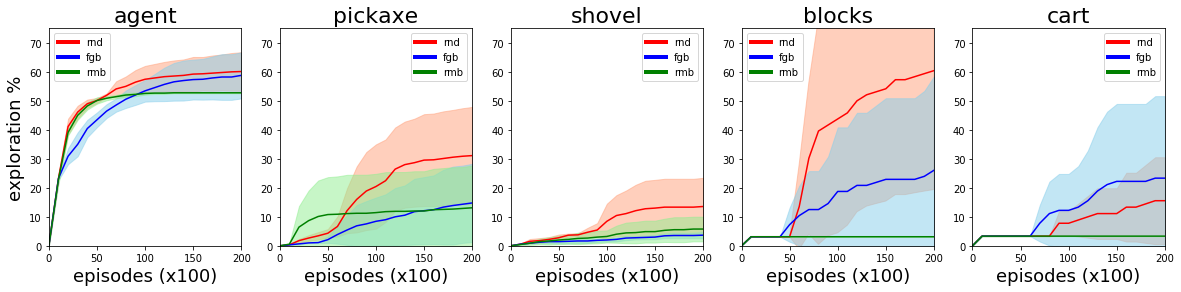

In [23]:
def plot_with_std(subplot_nb, ax,x,y,err,color,shade_color,label,y_min=None,y_max=None, legend=False, title=None):
    #plt.rcParams.update({'font.size': 15})
    ax.plot(x,y, color=color, label=label,linewidth=1.5)
    ax.fill_between(x,y-err,y+err,color=shade_color,alpha=0.5)
    if legend:
        leg = ax.legend(loc='bottom right')
        for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)
    ax.set_xlabel('episodes (x100)', fontsize=18)
    if subplot_nb == 0:
        ax.set_ylabel('exploration %', fontsize=18)
    ax.set_xlim(xmin=min(x),xmax=max(x))
    if y_min is not None:
        ax.set_ylim(bottom=y_min,top=y_max)
    if title:
        ax.set_title(title, fontsize=22)
        
metrics_mean_explo = [mean_a_explo, mean_p_explo, mean_s_explo, mean_b_explo, mean_c_explo] 
metrics_std_explo = [std_a_explo, std_p_explo, std_s_explo, std_b_explo, std_c_explo] 
plot_steps = np.arange(0,nb_episodes+step_size,step_size)

colors = ['red','blue','green','magenta','black','cyan','orange']
shades_colors = ['lightsalmon','skyblue','lightgreen','violet']
title_info = ["agent", "pickaxe", "shovel", "blocks", "cart"]
model_names = ["rnd","fgb","rmb","amb"]
metric = ["agent","pickaxe","shovel","blocks","cart"]
maxes=[75]*5
# Averaged plots
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1,5,figsize=(20,4))
ax = (ax0, ax1, ax2, ax3, ax4)
print(model_filenames)
for j, (models_mean_explo, models_std_explo) in enumerate(zip(metrics_mean_explo, metrics_std_explo)):
    for i,(mean_explo, std_explo) in enumerate(zip(models_mean_explo, models_std_explo)):
        y = mean_explo
        err = std_explo
        title = ''
        plot_with_std(j, ax[j], plot_steps//100,y,err,colors[i],shades_colors[i],model_names[i],
                      y_min=0,y_max=maxes[j], title=title+title_info[j], legend=True)
        
#plt.savefig("grid_cell_exploration.pdf", bbox_inches='tight')
plt.savefig("grid_cell_exploration.png", bbox_inches='tight')
plt.show()

In [ ]:
def plot_with_std(x,y,err,color,shade_color,label,y_min,y_max):
    plt.plot(x,y, color=color, label=label,linewidth=1.5)
    plt.fill_between(x,y-err,y+err,color=shade_color,alpha=0.5)
    leg = plt.legend(loc='lower right')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
    plt.xlabel('episodes')
    plt.ylabel('exploration %')
    if y_min is not None:
        plt.ylim(ymin=y_min,ymax=y_max)
    

labels = ['RND','F-RGB','RMB','AMB']
shades_colors = ['lightsalmon','skyblue','lightgreen','violet']
print("agent exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_a_explo[i,-1])
    y = mean_a_explo[i,:]
    err = std_a_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("shovel exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_s_explo[i,-1])
    y = mean_s_explo[i,:]
    err = std_s_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("pickaxe exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_p_explo[i,-1])
    y = mean_p_explo[i,:]
    err = std_p_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("cart")
for i in range(nb_models):
    print(std_c_explo[i,-1])
    y = mean_c_explo[i,:]
    err = std_c_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_cart_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("blocks")
for i in range(nb_models):
    y = mean_b_explo[i,:]
    err = std_b_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_bread_pos_expl.pdf", bbox_inches='tight')
plt.show()
#plt.plot(mean_a_explo, color='red', label=m_name.replace('_',' '))
#plt.plot(mean_c_explo, color='blue', label=m_name.replace('_',' '))
#plt.plot(mean_b_explo, color='green', label=m_name.replace('_',' '))
        

cat
dog
hand
magnet1
magnet2
magnet3
scratch1
scratch2
scratch3
static1
static2
static3
static4
stick1
stick2


IndexError: list index out of range

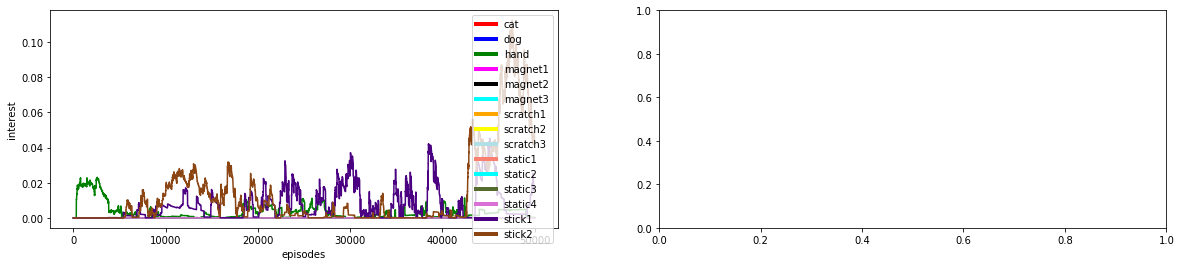

In [14]:
def plot_interests(ax,subplot_nb,interest_dict, legend=True, labels=None):
    colors = ['red','blue','green','magenta','black',
              'cyan','orange','yellow','powderblue','salmon','aqua','darkolivegreen',
             'orchid','indigo','saddlebrown']
    for i,(name,interests) in enumerate(sorted(interest_dict.items())):
        print(name)
        if labels is not None:
            ax.plot(interests, color=colors[i], label=labels[i],linewidth=1.5)
        else:
            ax.plot(interests, color=colors[i], label=name,linewidth=1.5)
    if subplot_nb == 0:
        ax.set_ylabel('interest')
        
    ax.set_xlabel('episodes')
    if legend:
        leg = ax.legend(loc='upper right')
        for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)

short_labels = ['agent','bread','cart','distr 1','distr 2','distr 3', 'distr 4']

# Plot interest curves:
f, (ax0, ax1) = plt.subplots(1,2,figsize=(20,4))
ax = (ax0, ax1)
for i in range(4):
    #print(saves[model_filenames[3]][i]['choosen_modules'])
    ints = saves[model_filenames[3]][i]['interests']
    plot_interests(ax[i],i,ints,legend=True,labels=None)
#plt.savefig("interests.png", bbox_inches='tight')




119
0
[[-0.57289907 -0.66171614]
 [-0.67909032 -0.81888574]
 [ 0.30959842  0.87720019]
 [-0.82363948 -0.69915342]
 [ 0.75335149 -0.30361694]]
[]


ValueError: operands could not be broadcast together with shapes (23,2) (0,) 

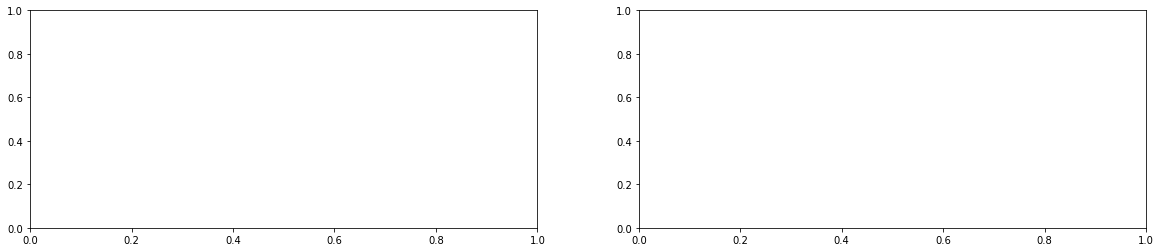

In [12]:
# Plot competence evolution for amb runs
f, (ax0, ax1) = plt.subplots(1,2,figsize=(20,4))
ax = (ax0, ax1)
m_names = ['cat']

for i in range(1):
    dists = {}
    for m_name in m_names:
        
        all_goals = saves[model_filenames[3]][0]['modules'][m_name].generated_goals
        all_outs = saves[model_filenames[3]][0]['modules'][m_name].observed_outcomes
        print(len(all_goals))
        print(len(all_outs))
        goals = np.array([all_goals[k-1] for k in range(5,len(all_goals),5)])
        outs = np.array([all_outs[k-1] for k in range(5,len(all_outs),5)])
        print(goals[-5:])
        print(outs[-5:])
        d = np.linalg.norm(goals - outs,axis=1)
        dists[m_name] = d
    #euc_d2 = np.linalg.norm(goals - outs,axis=1)
#     print(goals[0:3])
#     print(outs[0:3])
#     print(dists[0:3])
#     print(euc_d[0:3])
#     print(euc_d2[0:3])
#     print("h")
    plot_interests(ax[i],i,dists,legend=False,labels=None)

In [ ]:
# get interest curves names:
labels_2 = [s.replace('_',' ') for s in np.unique(saves[model_filenames[3]][0]['choosen_modules'])]

#labels = ['agent final position','bread final count','cart final position',
#               'fixed distractor 1 final position','fixed distractor 2 final position','moving distractor 1 final position', 'moving distractor 2 final position']
colors = ['red','blue','green','magenta','black','cyan','orange']

fig = pylab.figure()
figlegend = pylab.figure(figsize=(3.5,2))
ax = fig.add_subplot(111)
line_data = []
#for i in range(len(labels)):
#    line_data.append([range(10), pylab.randn(10), colors[i]])
print(len(labels_2))
if len(labels_2) == 3:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2])
elif len(labels_2) == 5:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2],
                    range(10),pylab.randn(10),colors[3],
                    range(10),pylab.randn(10),colors[4])
    
leg = figlegend.legend(lines, labels_2[:len(labels_2)], 'center')
for legobj in leg.legendHandles:
            legobj.set_linewidth(6.0)
        
figlegend.show()
figlegend.savefig('legend.png')

klj
625.781884431839


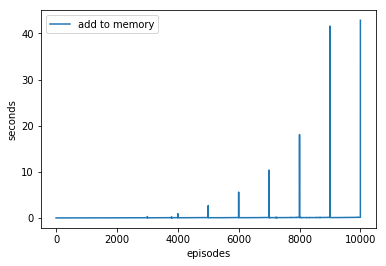

kljmodu
1112.5198822021484


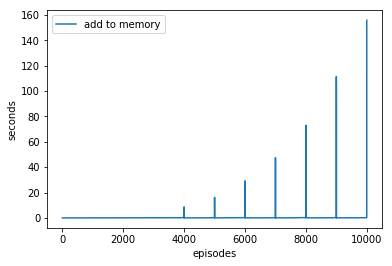

In [17]:
# Time complexity analysis
for m_name, m_id in zip(model_full_names,model_filenames):
    print(m_id)
    b_k = saves[m_id][0]
    if 'runtimes' in b_k:
        rts = b_k['runtimes']
        #print(rts['produce'][-100:])
        #plt.plot(rts['produce'],label='choose policy')
        #plt.plot(rts['run'],label='run episode')
        plt.plot(rts['perceive'],label='add to memory')
        print(sum(rts['perceive']))
        plt.legend()
        plt.ylabel('seconds')
        plt.xlabel('episodes')
    plt.savefig("time_complexity.png")
    plt.show()


In [10]:
# PLOT percentage of modules that moved specific objects
def plot_explo_per_module(ax, b_k, obj_labels, initial_pos, nb_steps):
    #first get list of idx where object moved for each module
    outcomes = []
    nb_outs = len(b_k[obj_labels[0]])
    nb_bt = nb_outs - len(b_k['choosen_modules'])
    #print("adding {} bootstrap to module list".format(nb_bt))
    modules = ["random"]*nb_bt + b_k['choosen_modules']
    for i in range(len(b_k[obj_labels[0]])):
        outcomes.append([b_k[obj][i] for obj in obj_labels])
    #print(len(modules))
    #print(outcomes[100:150])
    #return
    
    
    dict_module_idx = {}
    for m_name in np.unique(modules):
        #first list -> when the module was choosen
        #second list -> when the module moved the object
        dict_module_idx[m_name] = [np.zeros(nb_outs), np.zeros(nb_outs)]
    for i, (outc, module_name) in enumerate(zip(outcomes, modules)):
        dict_module_idx[module_name][0][i] = 1
        if outc != initial_pos:
            dict_module_idx[module_name][1][i] = 1
    
    # now plot
    for m_name, info in dict_module_idx.items():
        used = info[0]
        counts = info[1]
        d = []
        for max_episodes in np.arange(step_size,nb_episodes+step_size,step_size):
            d.append(np.sum(counts[max_episodes-step_size:max_episodes]) / np.sum(used[max_episodes-step_size:max_episodes]))
        if m_name in ['hand', 'stick1', 'stick2', 'magnet1','magnet2', 'random']:
            ax.plot(d, label=m_name,linewidth=1.5)
        
    
   

STICK1
0
Random Model Babbling


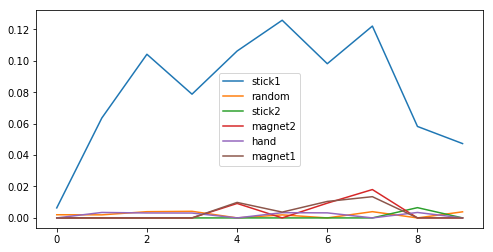

0
Active Model Babbling


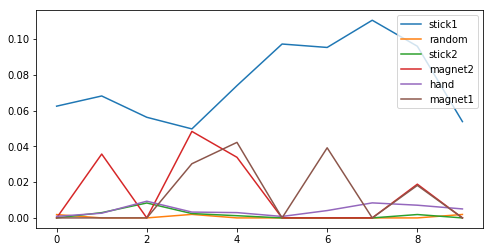

STICK2
0
Random Model Babbling


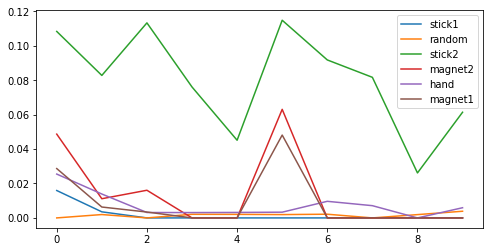

0
Active Model Babbling


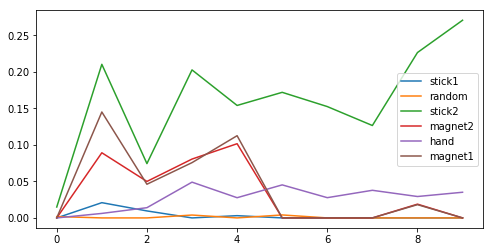

In [11]:
step_size = 5000
nb_steps = int(nb_episodes / step_size)
print('STICK1')
# pickaxe
for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
    if m_nb < 2:
        continue
    for i in range(nb_runs):
        print(i)
        f, ax = plt.subplots(1,1,figsize=(8,4))
        print(m_name)
        b_k = saves[m_id][i]
        plot_explo_per_module(ax, b_k, ['end_stick1_x', 'end_stick1_y'],
                              [-1.1035533905932737, 0.6035533905932737], nb_steps)
        plt.legend()
        #plt.savefig("explo_mods_pickaxe{}{}.png".format(m_name,i), bbox_inches='tight')
        plt.show()

print('STICK2')
# pickaxe
for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
    if m_nb < 2:
        continue
    for i in range(nb_runs):
        print(i)
        f, ax = plt.subplots(1,1,figsize=(8,4))
        print(m_name)
        b_k = saves[m_id][i]
        plot_explo_per_module(ax, b_k, ['end_stick2_x', 'end_stick2_y'],
                              [1.1035533905932737, 0.6035533905932737], nb_steps)
        plt.legend()
        #plt.savefig("explo_mods_pickaxe{}{}.png".format(m_name,i), bbox_inches='tight')
        plt.show()


        
# print('SHOVEL')        
# for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
#     if m_nb == 0:
#         continue
#     for i in range(nb_runs):
#         print(i)
#         f, ax = plt.subplots(1,1,figsize=(8,4))
#         print(m_name)
#         b_k = saves[m_id][i]
#         plot_explo_per_module(ax, b_k, ['end_shovel_x', 'end_shovel_z'], [290.5, 436.5], nb_steps)
#         plt.legend()
#         plt.savefig("explo_mods_shovel{}{}.png".format(m_name,i), bbox_inches='tight')
#         plt.show()

# print('BLOCKS')
# for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
#     if m_nb == 0:
#         continue
#     for i in range(nb_runs):
#         print(i)
#         f, ax = plt.subplots(1,1,figsize=(8,4))
#         print(m_name)
#         b_k = saves[m_id][i]
#         initial_v = [-1.0, -1.0, -1.0, -1.0, -1.0]
#         labels = ['end_block_0','end_block_1','end_block_2', 'end_block_3','end_block_4']
#         plot_explo_per_module(ax, b_k, labels, initial_v, nb_steps)
#         plt.legend()
#         plt.savefig("explo_mods_blocks{}{}.png".format(m_name,i), bbox_inches='tight')
#         plt.show()
        

# print('CART')
# for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
#     if m_nb == 0:
#         continue
#     for i in range(nb_runs):
#         print(i)
#         f, ax = plt.subplots(1,1,figsize=(8,4))
#         print(m_name)
#         b_k = saves[m_id][i]
#         initial_v = [291.5]
#         labels = ['end_cart_x']
#         plt.savefig("explo_mods_cart{}{}.png".format(m_name,i), bbox_inches='tight')
#         plot_explo_per_module(ax, b_k, labels, initial_v, nb_steps)
#         plt.legend()
#         plt.show()